# Final Project: Overview

# Objective

The objective of this project is for you to demonstrate your mastery of the Machine Learning process
**using Neural Networks**.



# Submission requirements

The guidelines will be similar to the Midterm
- you will write a procedure that takes raw data and produces predictions

You will submit a *single* model for evaluation.

**Demonstrate that all cells in your notebook work**

The final cell in your notebook should print the message "Done"
- `print("Done")`
- If we run your notebook and this last cell does not execute your submission will be inadequate

## Testing

*You must perform out of sample testing*.

If you want to perform cross-validation in training, that is fine, but you
must *also* test out of sample to show that you are not over-fitting.

It is up to you to create the out of sample data that you feel best evaluates your model.

We will create holdout data (that we will not show you) for grading.

The procedure you write to make predictions should be able to work on the unseen holdout data
(similar to how it should work for your test set but the holdout set has *no targets*)

    

# The data

Data will be provided to you
- as multiple files in a directory which we refer to as a *data directory*

The reason for this is that the different files may convey different information.

You will be responsible for deciding
- which files to use
- which fields within the files to use

We will give you a data directory for training.

# Submission guidelines

Here are the basics, a code template that you must complete is in the following cells
- you will be required to store  your model in a file
- you will be required to write a procedure `MyModel` that takes two arguments
    - `test_dir`
        - this is a *relative path* to the holdout data directory
    - `model_save_file`
        - this is a *relative path* to the file containing your model
- the holdout data directory is similar in structure to the training data directory
    - but without target labels !  It is your job to predict these.
- your procedure must produce predictions given this holdout data directory

This means that your procedure must
- prepare the files in the holdout data directory similar to the way that they were prepared in the training data directory

We will provide you with a sample data directory that will resemble the holdout -- this is so that you
may test the procedure you write for submission.



## Detailed submission guidelines


In **addition to your notebook that trains/evaluates your model**,
- please also submit the file that contains your trained model.
    - use `saveModel` to put your final, trained model in this file
- We will **not** train your model; we will only use the method `MyModel`
    - which **you** will implement
    - and which uses `loadModel` and the name of the file in which the model was saved
    - this will create the model that we will evaluate


Here is a code template for you to complete
- it will save your model (assuming it is in variable `my_model`)
- it provides the specification for procedure `MyModel`, which *you must complete*


In [ ]:
import os
from tensorflow.keras.models import load_model

modelName = "final_model"
model_path = os.path.join(".", modelName)

def saveModel(model, model_path):
    """
    Save a model

    Parameters
    ----------
    model: a Keras model object
    model_path: String.  Relative path to a file in which the model will be stored


    Returns
    -------
    model_save_file: String.  Name of the file in which the model has been saved
        - this will be model_path with the proper file-extension added
    """

    model_save_file = model_path + '.keras'

    model.save(model_save_file)

    print(f"Model saved in {model_save_file:s}; submit with your assignment.")

    return model_save_file

def loadModel(model_save_file):
    model = tf.keras.models.load_model( model_save_file )

    return model

def MyModel(test_dir, model_save_file):
    # YOU MAY NOT change model after this statement !
    model = loadModel(model_save_file)

    # It should run model to create an array of predictions; we initialize it to the empty array for convenience
    predictions = []

    # We need to match your array of predictions with the examples you are predicting
    # The array below (ids) should have a one-to-one correspondence and identify the example your are predicting
    # For Bankruptcy: the Id column
    # For Stock prediction: the date on which you are making a prediction
    ids = []

    # YOUR CODE GOES HERE


    return predictions, ids

# Assign to variable my_model the model that is your final model (the one  you will be evaluated on)
my_model = None # CHANGE None to your model !

# model_save_file = saveModel(my_model, model_path)

# 0. Constants

In [ ]:
from typing import Final

DATASET_URL: Final = "https://github.com/rogerli2020/Stock-Prediction-FRE7773-Final-Project/raw/refs/heads/main/Data.tar"
DATA_RELATIVE_PATH: Final = "./Data"
TRAIN_SET_RELATIVE_PATH: Final = "./Data/train"
SAMPLE_SET_RELATIVE_PATH: Final = "./Data/sample"

# 1. Getting and Loading the Data

In [ ]:
from typing import Dict
import os
import urllib.request
import tarfile
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

class MyDataset:
  def __init__(self, download_anyway: bool = False) -> None:
    self.train_set : Dict[str, pd.DataFrame] = None
    self.sample_set : Dict[str, pd.DataFrame] = None

    self._download_anyway = download_anyway

    self._load_dataset()

  def _load_dataset(self):
    def load_dataset_from_dir(dir : str) -> dict:
      data_dict = {}
      if not os.path.isdir(dir):
        raise ValueError(f"The provided path '{dir}' is not a directory or does not exist.")
      for file_name in os.listdir(dir):
        if file_name.endswith(".csv"):
          file_path = os.path.join(dir, file_name)
          key = os.path.splitext(file_name)[0]
          try:
            data_dict[key] = pd.read_csv(file_path)
            data_dict[key]['Dt'] = pd.to_datetime(data_dict[key]['Dt'])
            data_dict[key] = data_dict[key].set_index('Dt')
          except Exception as e:
            print(f"Error reading {file_name}: {e}")
      return data_dict

    self._download_dataset()
    self.train_set = load_dataset_from_dir(TRAIN_SET_RELATIVE_PATH)
    self.sample_set = load_dataset_from_dir(SAMPLE_SET_RELATIVE_PATH)
    assert isinstance(self.train_set, dict) and len(self.train_set) > 0, "train_set must be a non-empty dictionary"
    assert isinstance(self.sample_set, dict) and len(self.sample_set) > 0, "sample_set must be a non-empty dictionary"
    print("Dataset loaded!")

  def _download_dataset(self):
    if os.path.isdir(DATA_RELATIVE_PATH) and not self._download_anyway:
      print("Data already exist... Skipping download.")
      return
    try:
      tar_file_path, _ = urllib.request.urlretrieve(DATASET_URL)
      with tarfile.open(tar_file_path, "r") as tar:
          tar.extractall()
    except Exception as e:
      print(f"An error occurred during download or extraction: {e}")
    finally:
      if os.path.exists(tar_file_path):
        os.remove(tar_file_path)

  @staticmethod
  def graph_dataset_df(dataset : pd.DataFrame):
    plt.figure(figsize=(8, 5))

    # Plot each column
    for column in dataset.columns:
        plt.plot(dataset.index, dataset[column], label=column)

    # Set title, labels, and grid
    plt.title("Graph")
    plt.xlabel("Date")
    plt.ylabel("Values")

    # Format x-axis to show Year only
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.YearLocator())  # Tick every year
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format as 'Year'

    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

dataset : MyDataset = MyDataset(download_anyway=True)

Dataset loaded!


# 2. Trying to Understand the Data

Shape of Data:

In [ ]:
print(dataset.train_set['AAPL'].shape)
print(dataset.sample_set['AAPL'].shape)

(4277, 8)
(251, 8)


In [ ]:
dataset.sample_set['AAPL'].head()

Adj Close   Close  Div  Factor      High     Low    Open  \
Dt                                                                     
2017-01-03   110.9418  116.15  0.0     1.0  116.3300  114.76  115.80   
2017-01-04   110.8176  116.02  0.0     1.0  116.5100  115.75  115.85   
2017-01-05   111.3812  116.61  0.0     1.0  116.8642  115.81  115.92   
2017-01-06   112.6229  117.91  0.0     1.0  118.1600  116.47  116.78   
2017-01-09   113.6545  118.99  0.0     1.0  119.4300  117.94  117.95   

                Volume  
Dt                      
2017-01-03  28781865.0  
2017-01-04  21118116.0  
2017-01-05  22193587.0  
2017-01-06  31751900.0  
2017-01-09  33561948.0

### 2.1 Features:

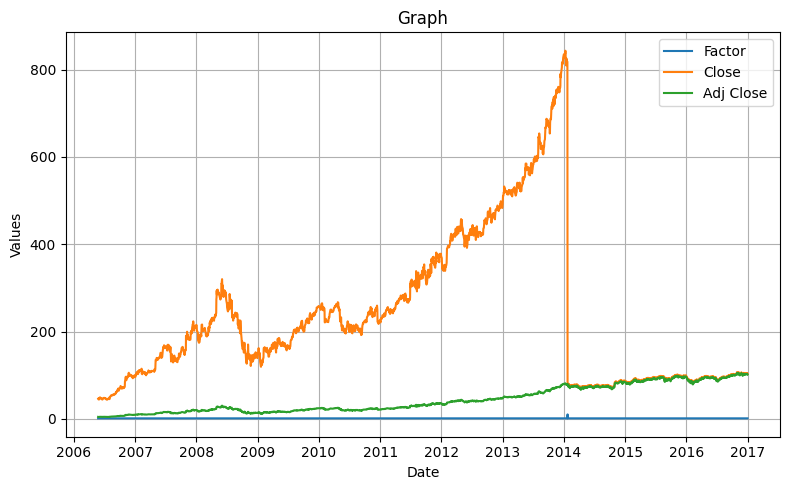

In [ ]:
MyDataset.graph_dataset_df(dataset.train_set['MA'][['Factor', 'Close', 'Adj Close']])

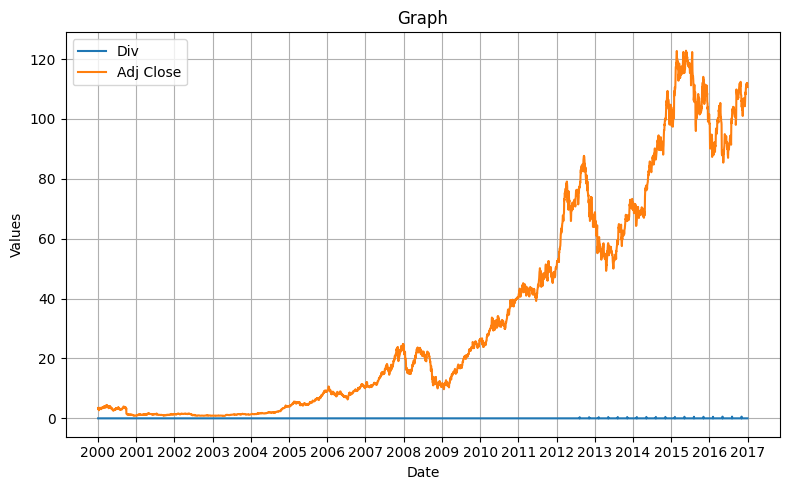

In [ ]:
MyDataset.graph_dataset_df(dataset.train_set['AAPL'][['Div', 'Adj Close']])

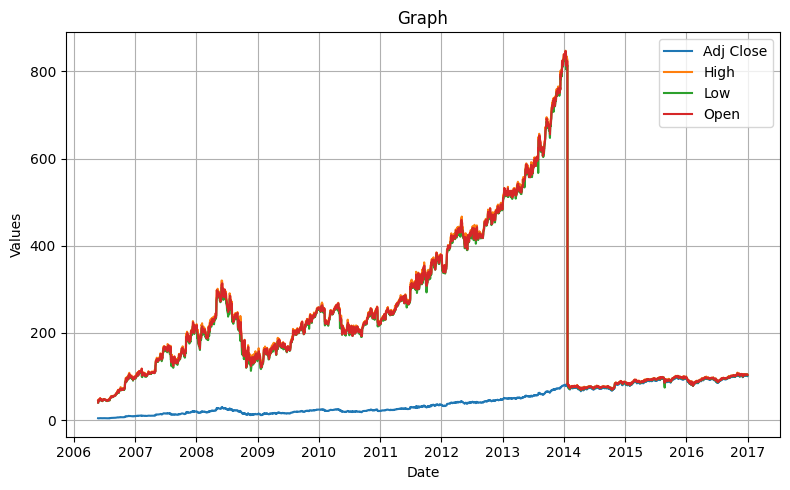

In [ ]:
MyDataset.graph_dataset_df(dataset.train_set['MA'][['Adj Close', 'High', 'Low', 'Open']])

# 3. Exploratory Data Analysis and Some Feature Engineering

## 3.1 Features: Log Return (float) and Positive Return (bool)

* Daily return is calculated as
```np.log1p(df['Adj Close'].pct_change())```
which is the log return of the stock today based on today and yesterday's closing prices alone.

In [ ]:
import numpy as np
import math

class FeatureCreator:
  @staticmethod
  def create_feature_for_all_stocks(dataset : MyDataset, func : callable):
    """
      Apply the function to all stocks in the dataset.
    """
    for dataset_dict in [dataset.train_set, dataset.sample_set]:
      for ticker, df in dataset_dict.items():
        dataset_dict[ticker] = func(df)

  @staticmethod
  def create_SPY_features_for_all_stocks(dataset : MyDataset):
    for dataset_dict in [dataset.train_set, dataset.sample_set]:
      for ticker, df in dataset_dict.items():
        dataset_dict[ticker]['SPY Return'] = dataset_dict['SPY']['Return']
        dataset_dict[ticker]['SPY Volatility'] = dataset_dict['SPY']['Volatility']

  @staticmethod
  def create_return_column_for_single_stock(df : pd.DataFrame):
    df['Return'] = np.log1p(df['Adj Close'].pct_change())
    df.dropna(subset=['Return'], inplace=True)
    return df

  @staticmethod
  def create_volatility_column_for_single_stock(df : pd.DataFrame):
    def garman_klass(price_data, window=3, trading_periods=252, clean=False):
      # taken from https://www.pyquantnews.com/the-pyquant-newsletter/how-to-compute-volatility-6-ways
      log_hl = (price_data["High"] / price_data["Low"]).apply(np.log)
      log_co = (price_data["Close"] / price_data["Open"]).apply(np.log)
      rs = 0.5 * log_hl ** 2 - (2 * math.log(2) - 1) * log_co ** 2
      def f(v):
        return (trading_periods * v.mean()) ** 0.5
      result = rs.rolling(window=window, center=False).apply(func=f)
      result.bfill(inplace=True)
      return result

    df['Volatility'] = garman_klass(df)
    return df

  @staticmethod
  def create_positive_return_column_for_single_stock(df : pd.DataFrame):
    """
      Get the daily log returns based on Adj Close.
    """
    df['Positive Return'] = np.where(df['Return'] > 0, 1, 0)
    return df

  @staticmethod
  def create_absolute_return_column_for_single_stock(df : pd.DataFrame):
    """
      Get the daily log returns based on Adj Close.
    """
    df['Absolute Return'] = df['Return'].abs()
    return df

In [ ]:
# Creating return column for all stocks in the dataset.
FeatureCreator.create_feature_for_all_stocks(
    dataset,
    FeatureCreator.create_return_column_for_single_stock
)

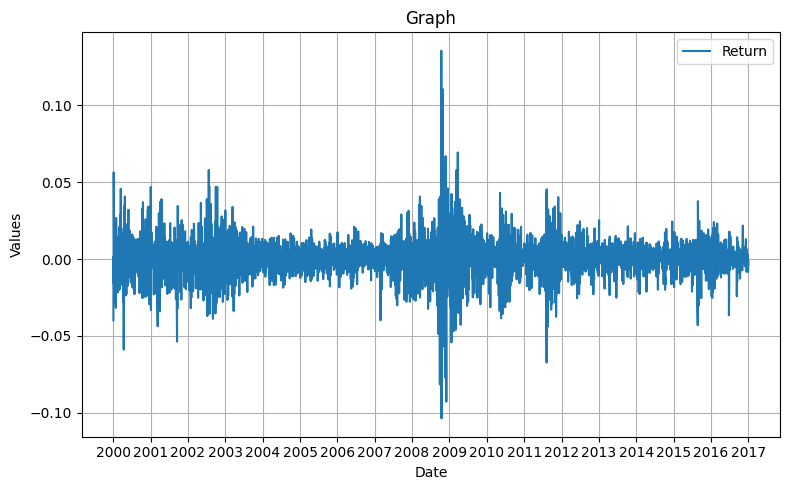

In [ ]:
# Visualizing the returns for SPY.
MyDataset.graph_dataset_df(dataset.train_set['SPY'][['Return']])

In [ ]:
# Creating the Positive Return column for all stocks.
FeatureCreator.create_feature_for_all_stocks(
    dataset,
    FeatureCreator.create_positive_return_column_for_single_stock
)

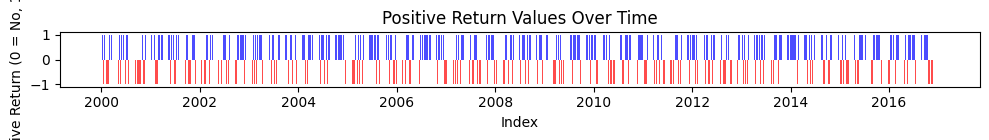

In [ ]:
# Visualizing the Positive Return column for SPY.
transformed_values = dataset.train_set['SPY']['Positive Return'].replace({0: -1, 1: 1})
plt.figure(figsize=(10, 1.5))
plt.bar(dataset.train_set['SPY'].index, transformed_values, color=['red' if x == -1 else 'blue' for x in transformed_values], alpha=0.7)
plt.title('Positive Return Values Over Time')
plt.xlabel('Index')
plt.ylabel('Positive Return (0 = No, 1 = Yes)')
plt.tight_layout()
plt.show()

In [ ]:
# Creating the volatility column for all stocks.
FeatureCreator.create_feature_for_all_stocks(
    dataset,
    FeatureCreator.create_volatility_column_for_single_stock,
)

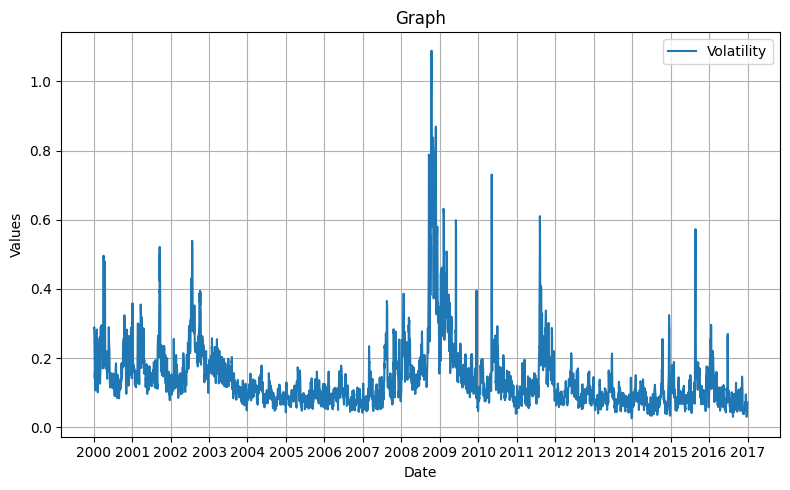

In [ ]:
# Graph SPY's volatility
MyDataset.graph_dataset_df(dataset.train_set['SPY'][['Volatility']])


In [ ]:
# Creating the Absolute Return column for all stocks.
FeatureCreator.create_feature_for_all_stocks(
    dataset,
    FeatureCreator.create_absolute_return_column_for_single_stock,
)

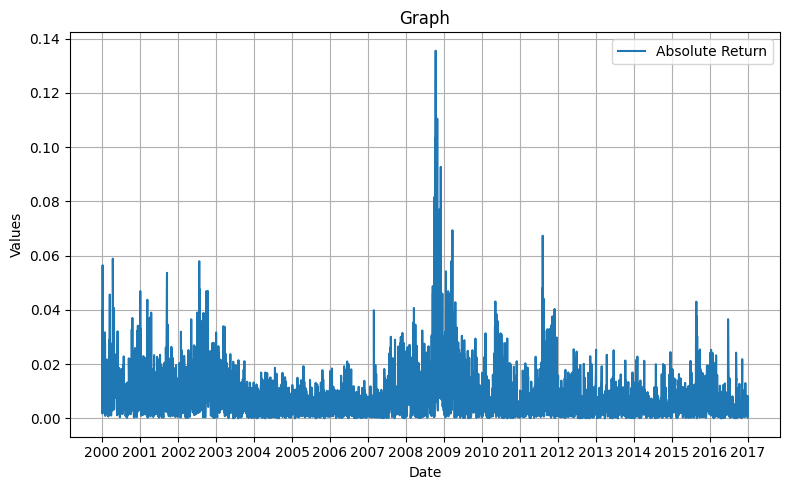

In [ ]:
# Graph SPY's volatility
MyDataset.graph_dataset_df(dataset.train_set['SPY'][['Absolute Return']])

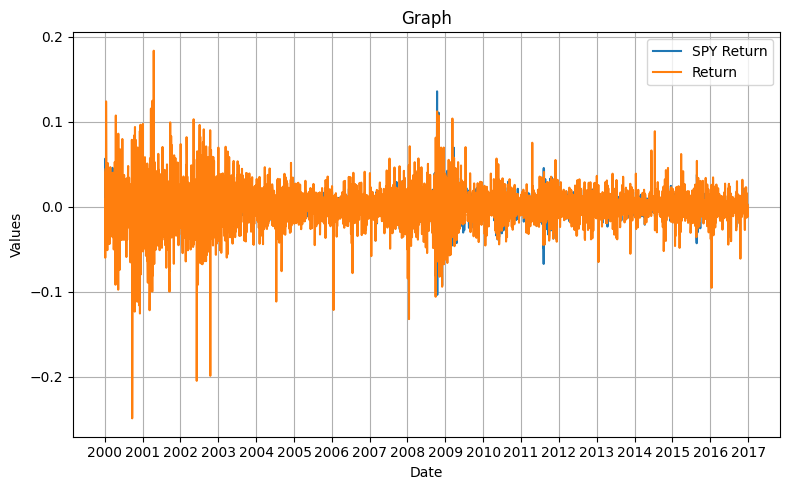

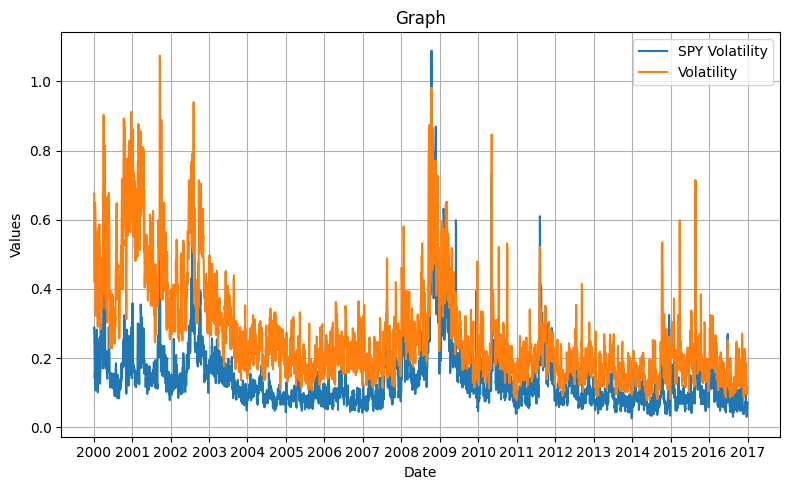

In [ ]:
FeatureCreator.create_SPY_features_for_all_stocks(
    dataset,
)

# graph
MyDataset.graph_dataset_df(dataset.train_set['INTC'][['SPY Return', 'Return']])
MyDataset.graph_dataset_df(dataset.train_set['INTC'][['SPY Volatility', 'Volatility']])

## 3.2 Autocorrelation

- Get a sense of the autocorrelation for Returns and Volatility
- As can be seen below, volatility has high autocorrelation! which is expected, and implies that it's suitable for GARCH

In [ ]:
returns = dataset.train_set['SPY']['Return']
print('Return:')
print([returns.autocorr(lag) for lag in range(1, 11)])
volatility = dataset.train_set['SPY']['Volatility']
print('Volatility:')
print([volatility.autocorr(lag) for lag in range(1, 11)])

Return:
[-0.06341104423275877, -0.06683383319260607, 0.011481822454585271, -0.004267713108093837, -0.039114010578752016, -0.0013576821824413767, -0.016158033295313807, 0.01932666701475728, -0.018576276097050173, 0.006215832852123406]
Volatility:
[0.9310519082142076, 0.8467132861441267, 0.760795193172249, 0.7395915829281764, 0.7288696945365623, 0.7236258452142338, 0.7172342693885843, 0.7044943298112298, 0.6878178332035515, 0.6706639714289511]


## 3.3 Testing with GARCH(p,q) for volatility forecast

In [ ]:
# Experiment with GARCH model.
# Download and import relevant GARCH modules.
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 13.5 MB/s eta 0:00:00


MSE = 0.9616407566650442


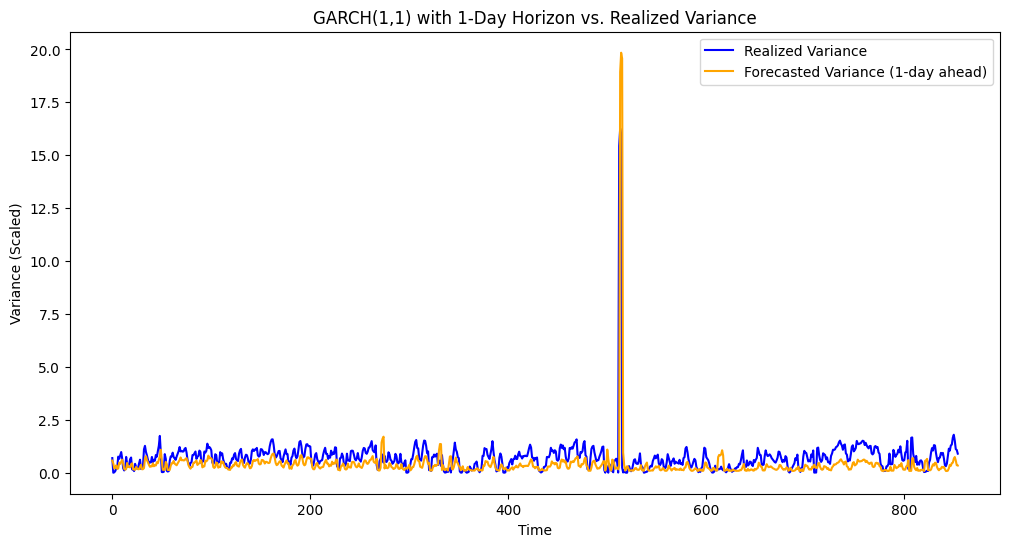

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from sklearn.preprocessing import StandardScaler

data = dataset.train_set['AAPL']['Volatility'].to_frame()

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Split the data
split_idx = int(len(scaled_data) * 0.8)
train_data = scaled_data[:split_idx]
test_data = scaled_data[split_idx:]

# Step 4: Initialize rolling forecast
rolling_forecast_variance = []
history = train_data.flatten().tolist()

for actual in test_data.flatten():
  model = arch_model(history, vol='Garch', p=1, q=1, dist='normal')
  model_fit = model.fit(disp='off')

  # Forecast 1 step ahead
  forecast = model_fit.forecast(horizon=1)
  rolling_forecast_variance.append(forecast.variance.values[-1, 0])

  # Update history with the actual value
  history.append(actual)

# Step 5: Plot the results
# Convert variance forecasts and actual squared returns back to readable scales
rolling_forecast_variance = np.array(rolling_forecast_variance)
realized_measures = test_data.flatten() ** 2

print(f'''MSE = {
    np.mean((rolling_forecast_variance - realized_measures) ** 2)
}''')

plt.figure(figsize=(12, 6))
plt.plot(realized_measures, label='Realized Variance', color='blue')
plt.plot(rolling_forecast_variance, label='Forecasted Variance (1-day ahead)', color='orange')
plt.title('GARCH(1,1) with 1-Day Horizon vs. Realized Variance')
plt.xlabel('Time')
plt.ylabel('Variance (Scaled)')
plt.legend()
plt.show()


seems like GARCH(1,1) is generally following the trends for r^2 and is able to predict peaks for out of sample data on a rolling basis!

## 3.4 Check if data is imbalance for price movement direction boolean values

As can be seen in the cell below, proportions fluctuates around a 50-50 split.
For some stocks, it is slightly unbalanced so the classification model needs to handle the imbalance!

In [ ]:
# do it for all stocks, and get an average
positive_return_percentages = []
for ticker in dataset.train_set.keys():
  positive_return_percentages.append(dataset.train_set[ticker]['Positive Return'].value_counts(normalize=True)[1])
  print(f"{ticker}: {dataset.train_set[ticker]['Positive Return'].value_counts(normalize=True)}")

print(f"Average: {np.mean(positive_return_percentages)}")

XLI: Positive Return
1    0.528064
0    0.471936
Name: proportion, dtype: float64
NVDA: Positive Return
1    0.505847
0    0.494153
Name: proportion, dtype: float64
ADBE: Positive Return
1    0.510758
0    0.489242
Name: proportion, dtype: float64
FB: Positive Return
1    0.520654
0    0.479346
Name: proportion, dtype: float64
XLY: Positive Return
1    0.518943
0    0.481057
Name: proportion, dtype: float64
GOOG: Positive Return
1    0.51413
0    0.48587
Name: proportion, dtype: float64
XLU: Positive Return
1    0.529935
0    0.470065
Name: proportion, dtype: float64
AAPL: Positive Return
1    0.515435
0    0.484565
Name: proportion, dtype: float64
XLB: Positive Return
1    0.52058
0    0.47942
Name: proportion, dtype: float64
V: Positive Return
1    0.526435
0    0.473565
Name: proportion, dtype: float64
XLF: Positive Return
1    0.511225
0    0.488775
Name: proportion, dtype: float64
XLE: Positive Return
1    0.518943
0    0.481057
Name: proportion, dtype: float64
CSCO: Positive Retu

# 4. Experimentation: GARCH Model Rolling Forecast for Next-Day Volatility

In [ ]:
# Experiment with GARCH model.
# Download and import relevant GARCH modules.
!pip install arch

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from sklearn.preprocessing import StandardScaler

class GARCHManager:
  def __init__(self, dataset: 'MyDataset', p: int = 1, q: int = 1):
    self.p = p
    self.q = q
    self._dataset = dataset
    self.garch_models = {}
    self.scalers = {}

  def fit_garch_for_single_stock(self, ticker: str):
    data = self._dataset.train_set[ticker]['Volatility'].to_frame()

    # Scale data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    train_data = scaled_data.flatten().tolist()

    # Fit GARCH model
    model = arch_model(train_data, vol='Garch', p=self.p, q=self.q, dist='normal')
    model_fit = model.fit(disp='off')

    # print(f'GARCH model fitted for {ticker}!')
    return model_fit, scaler

  def fit_garch_for_all_stocks(self):
    for ticker in self._dataset.train_set.keys():
      model, scaler = self.fit_garch_for_single_stock(ticker)
      self.garch_models[ticker] = model
      self.scalers[ticker] = scaler

  def get_in_sample_garch_values_for_single_stock(self, ticker: str):
    data = self._dataset.train_set[ticker]['Volatility'].to_frame()
    scaler = self.scalers[ticker]
    scaled_data = scaler.transform(data)
    scaled_data_flat = scaled_data.flatten()
    model_fit = self.garch_models[ticker]
    fitted_variances = model_fit.conditional_volatility

    return fitted_variances

  def get_out_of_sample_garch_values_for_single_stock(self, ticker: str):
    data = self._dataset.sample_set[ticker]['Volatility'].to_frame()
    scaler = self.scalers[ticker]
    scaled_data = scaler.transform(data)
    scaled_data_flat = scaled_data.flatten()

    rolling_forecast_variance = []

    train_scaled = scaler.transform(
      self._dataset.train_set[ticker]['Volatility'].to_frame()
    ).flatten()
    history = train_scaled.tolist()

    for actual in scaled_data_flat:
      model = arch_model(history, vol='Garch', p=self.p, q=self.q, dist='normal')
      model_fit = model.fit(disp='off')

      # Forecast the next variance
      forecast = model_fit.forecast(horizon=1)
      rolling_forecast_variance.append(forecast.variance.values[-1, 0])

      # Update history with the new data point
      history.append(actual)

    rolling_forecast_variance = np.array(rolling_forecast_variance)
    variance_proxy = scaled_data_flat ** 2

    mse = np.mean((rolling_forecast_variance - variance_proxy) ** 2)
    print(f"MSE = {mse}")

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(variance_proxy, label='Realized Variance Estimate (r^2)', color='blue')
    plt.plot(rolling_forecast_variance, label='Forecasted Variance (1-day ahead)', color='orange')
    plt.title(f'GARCH({self.p},{self.q}) with 1-Day Horizon vs. Realized Variance Estimate')
    plt.xlabel('Time')
    plt.ylabel('Variance (Scaled)')
    plt.legend()
    plt.show()
    return rolling_forecast_variance

  def get_in_sample_garch_values_for_all_stocks(self):
    """
      Get in sample garch values for all stocks, and append the results to their respective dataframe in self._dataset
      name the new column GARCH_VOL
    """
    for ticker in self._dataset.train_set.keys():
      garch_values = self.get_in_sample_garch_values_for_single_stock(ticker)
      self._dataset.train_set[ticker]['GARCH_VOL'] = garch_values ** 0.5

  def get_out_of_sample_garch_values_for_all_stocks(self):
      """
        Get out of sample garch values for all stocks, and append the results to their respective dataframe in self._dataset
        name the new column GARCH_VOL
      """
      counter = len(self._dataset.sample_set.keys())
      for ticker in self._dataset.sample_set.keys():
        print(f'[{counter} Remaining] Getting out-of-sample GARCH Forecast for {ticker}...')
        counter -= 1
        garch_values = self.get_out_of_sample_garch_values_for_single_stock(ticker)
        self._dataset.sample_set[ticker]['GARCH_VOL'] = garch_values ** 0.5



[24 Remaining] Getting out-of-sample GARCH Forecast for MA...
MSE = 0.3547031136496736


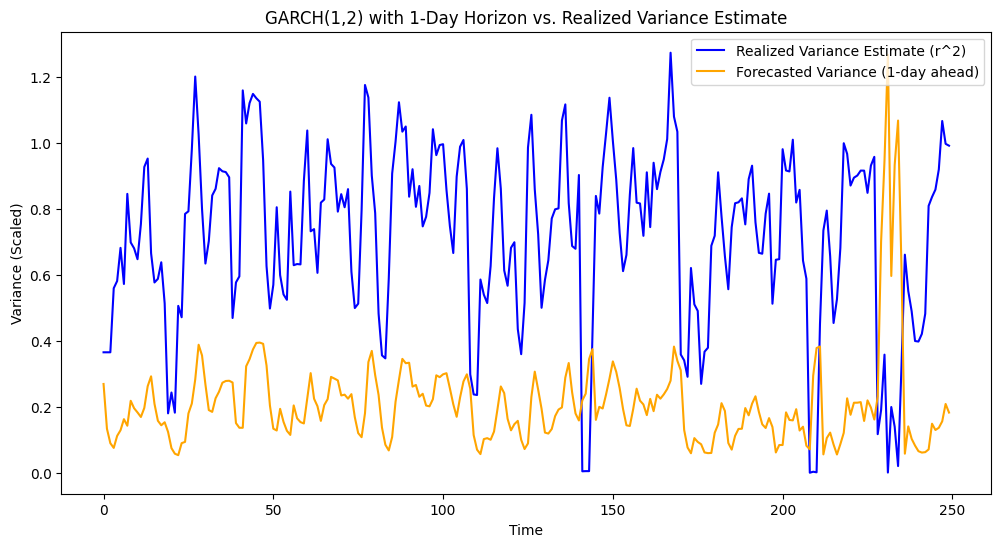

[23 Remaining] Getting out-of-sample GARCH Forecast for XLV...
MSE = 0.25406693234612576


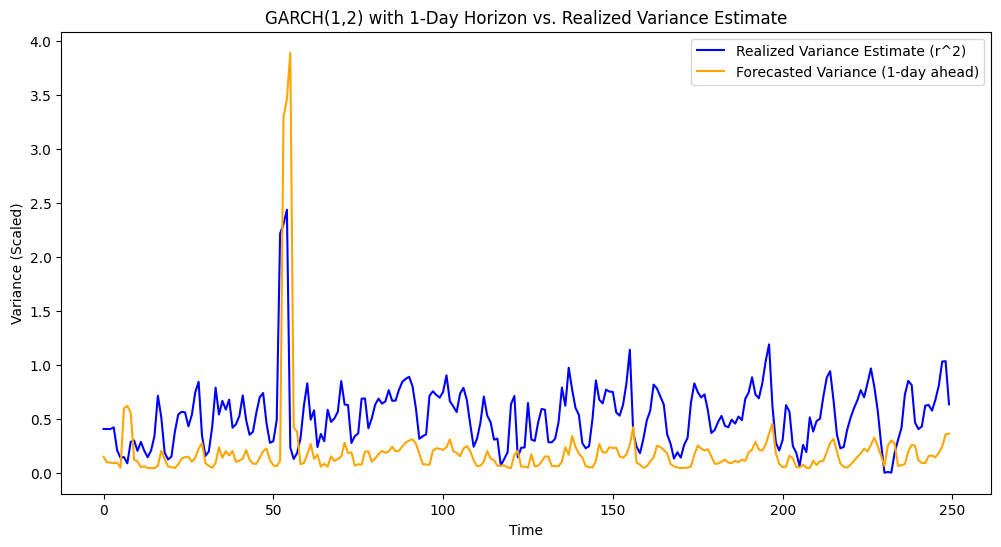

[22 Remaining] Getting out-of-sample GARCH Forecast for AAPL...
MSE = 0.6529063944786198


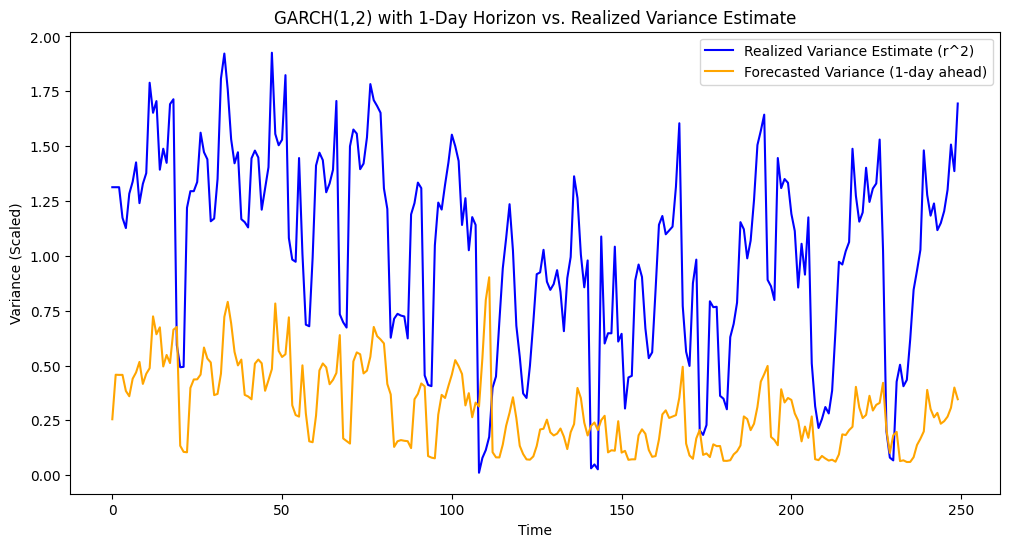

[21 Remaining] Getting out-of-sample GARCH Forecast for ADBE...
MSE = 0.3744015999823662


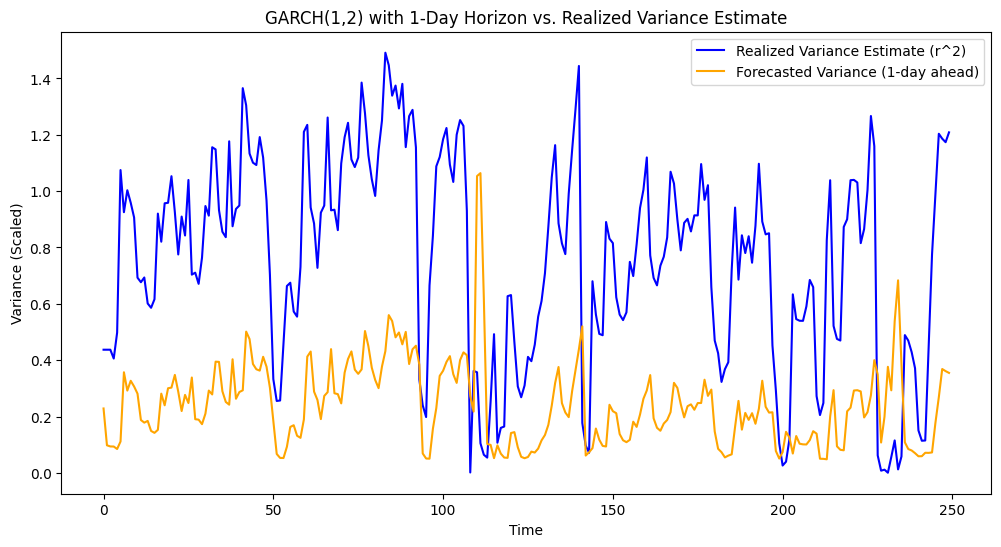

[20 Remaining] Getting out-of-sample GARCH Forecast for CRM...
MSE = 0.5063106595508738


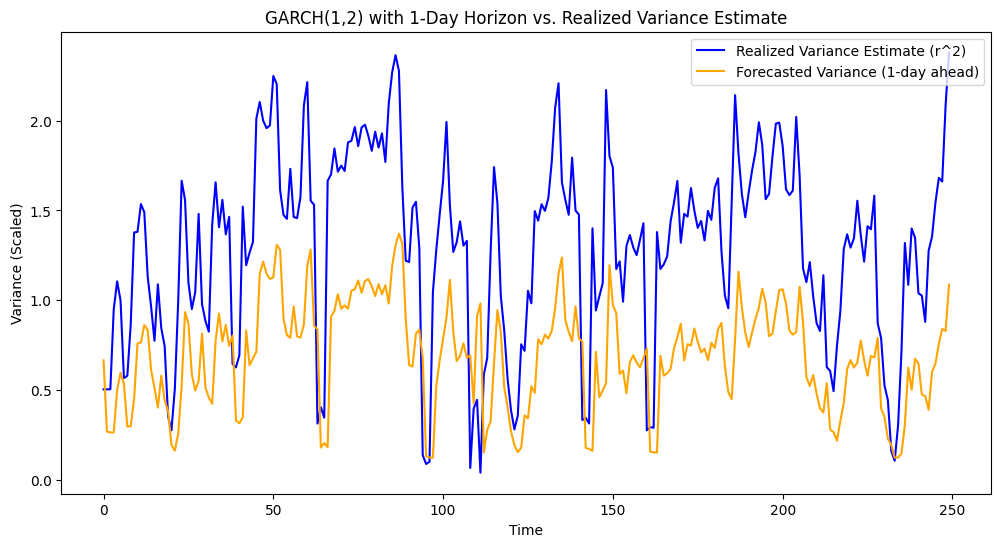

[19 Remaining] Getting out-of-sample GARCH Forecast for IBM...
MSE = 0.3363677723491418


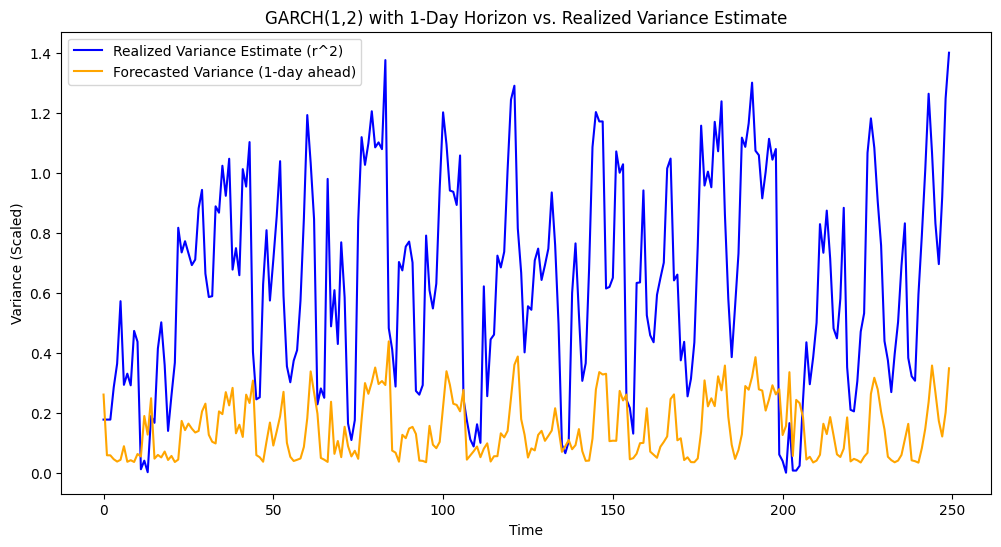

[18 Remaining] Getting out-of-sample GARCH Forecast for INTC...
MSE = 0.43890217921639885


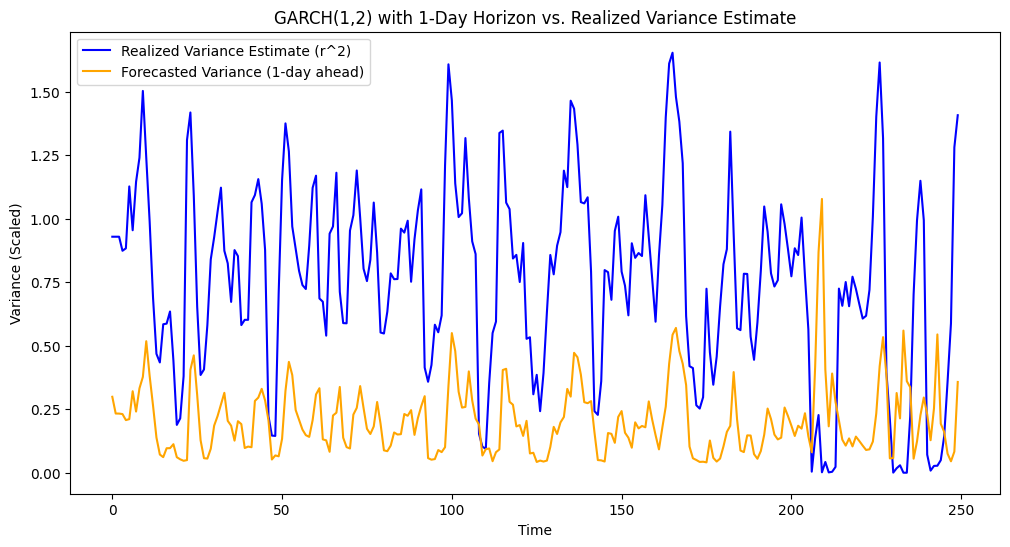

[17 Remaining] Getting out-of-sample GARCH Forecast for MSFT...
MSE = 0.45792101303999116


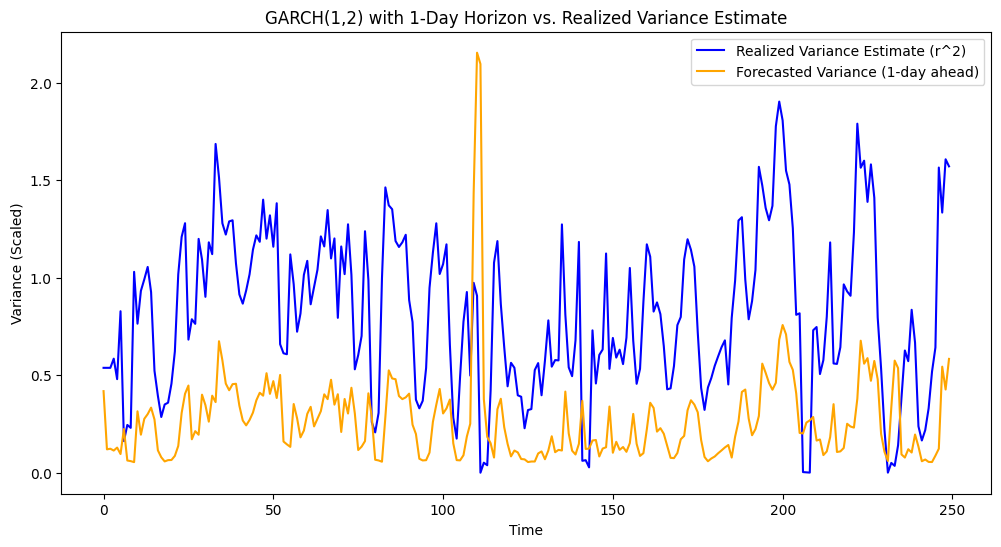

[16 Remaining] Getting out-of-sample GARCH Forecast for ACN...


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr

MSE = 0.02268558086572179


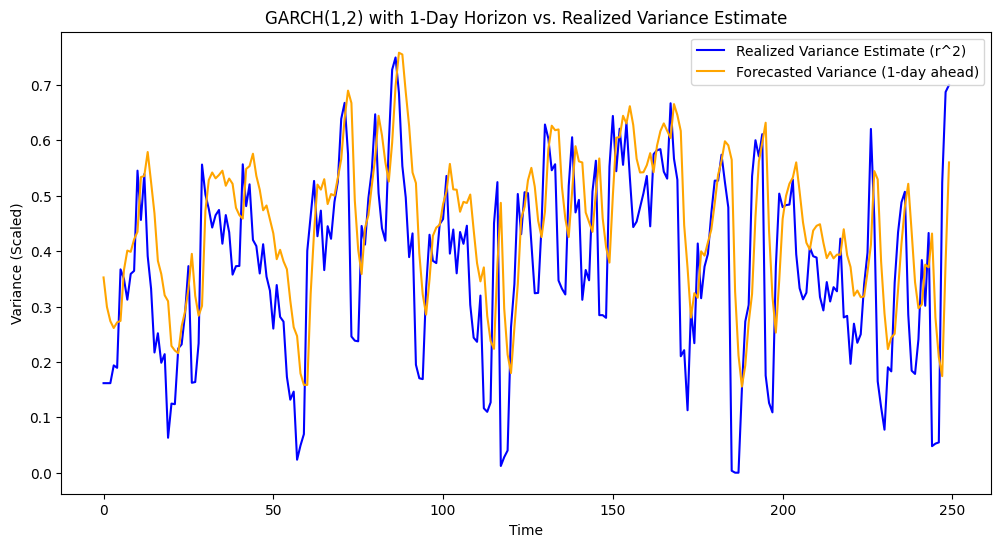

[15 Remaining] Getting out-of-sample GARCH Forecast for SPY...
MSE = 0.4473759364507326


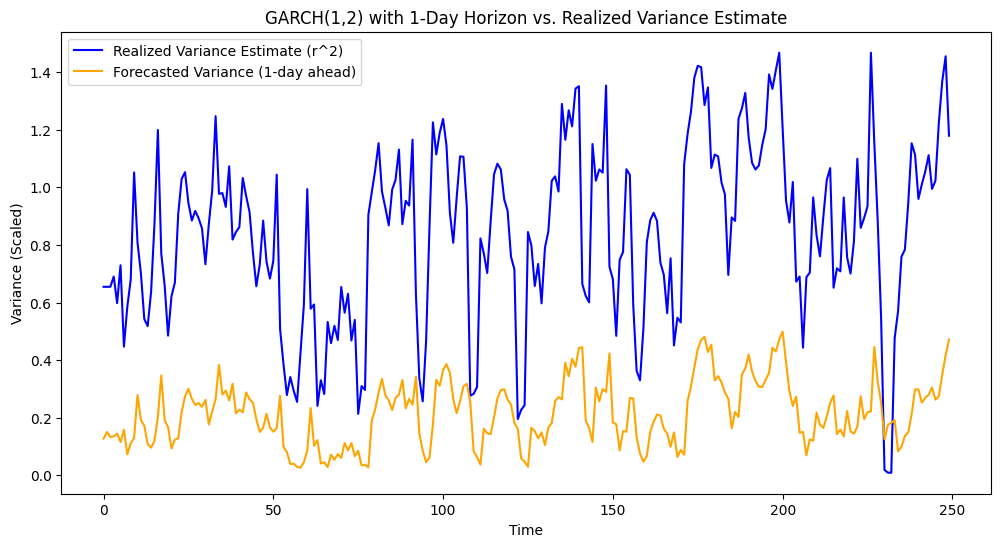

[14 Remaining] Getting out-of-sample GARCH Forecast for V...
MSE = 0.23773251180352642


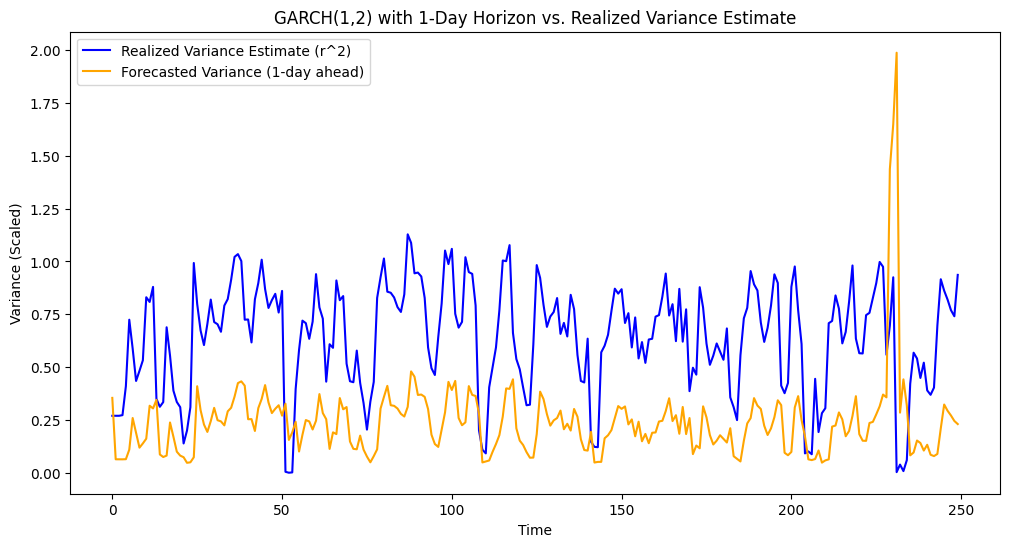

[13 Remaining] Getting out-of-sample GARCH Forecast for NVDA...
MSE = 0.42267858756153975


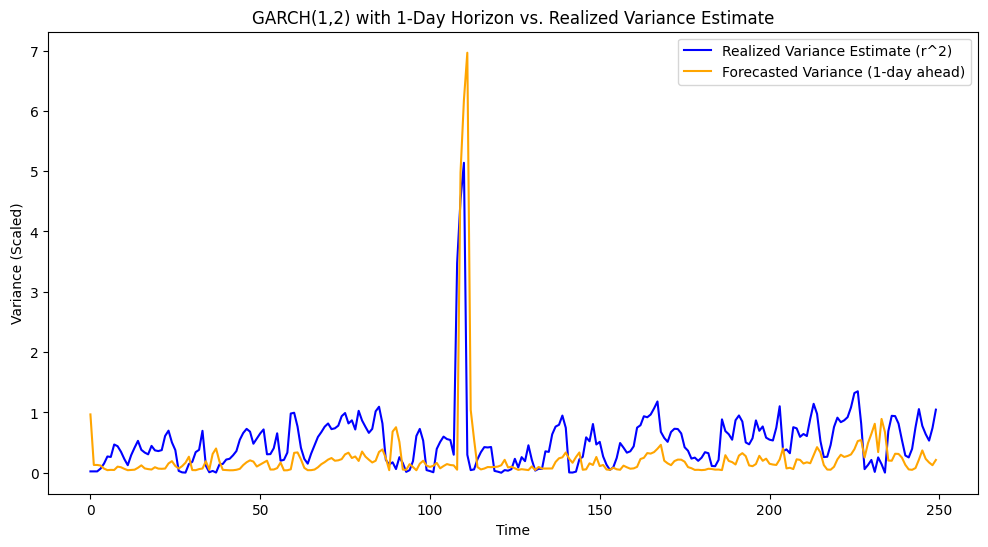

[12 Remaining] Getting out-of-sample GARCH Forecast for XLK...
MSE = 0.41100093820687345


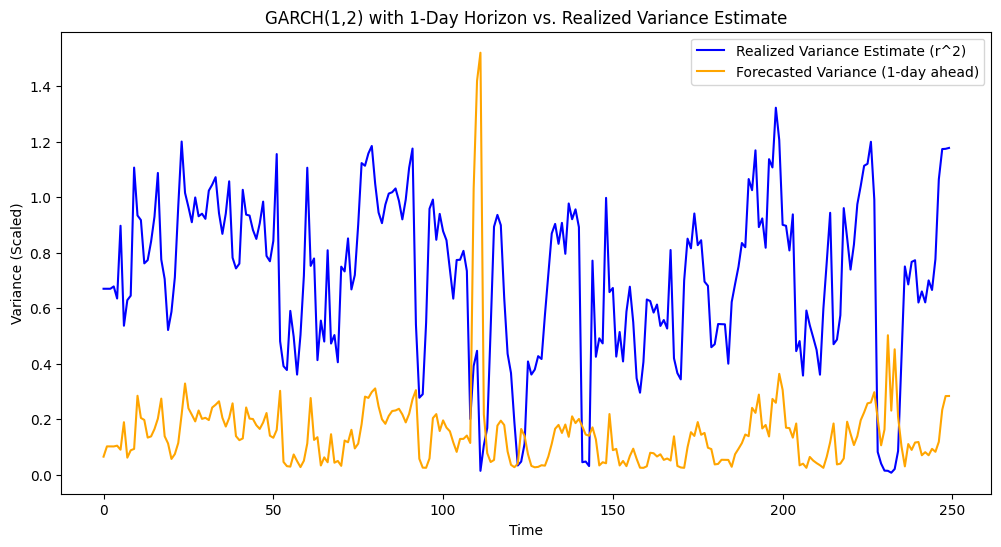

[11 Remaining] Getting out-of-sample GARCH Forecast for XLY...
MSE = 0.3250216770307673


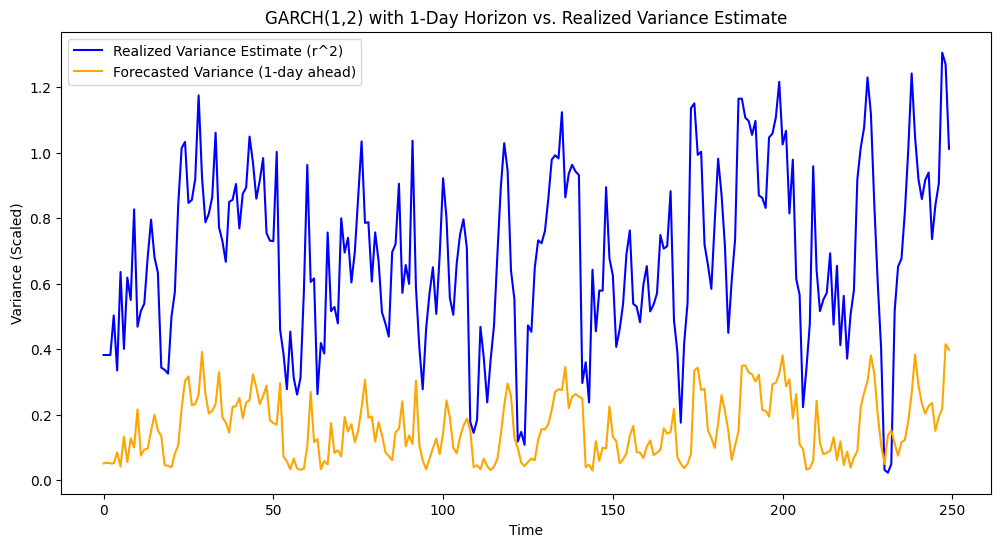

[10 Remaining] Getting out-of-sample GARCH Forecast for CSCO...
MSE = 0.42925619020948613


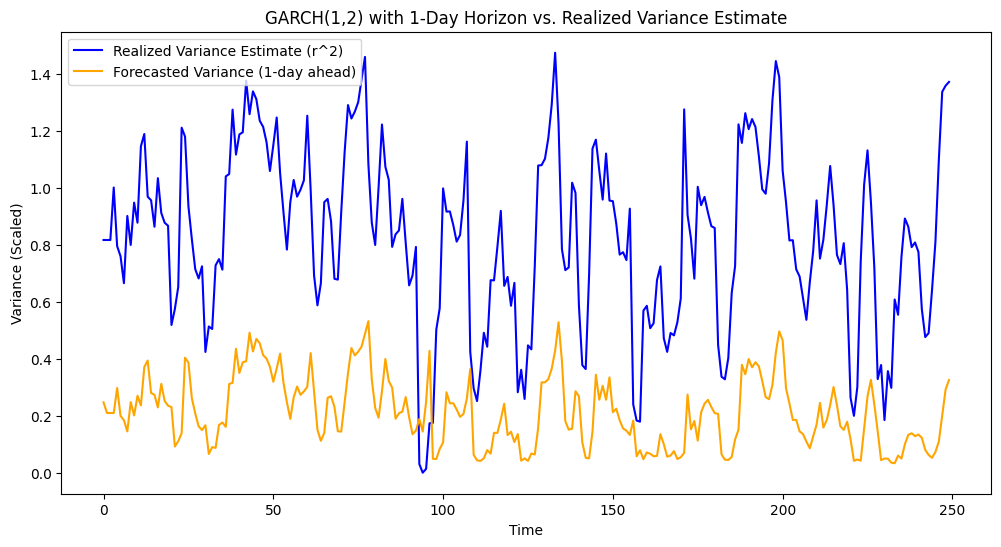

[9 Remaining] Getting out-of-sample GARCH Forecast for XLF...


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


MSE = 0.11497024476864744


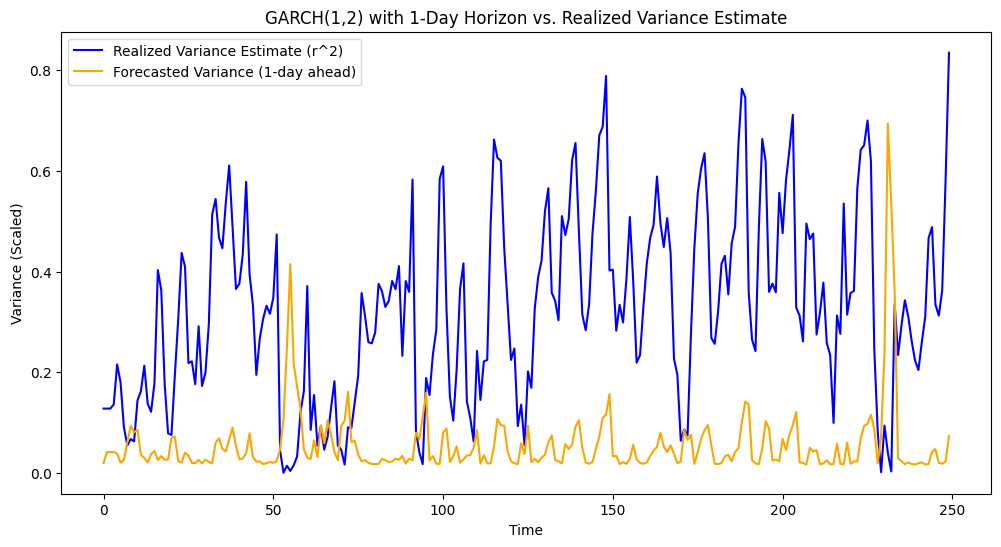

[8 Remaining] Getting out-of-sample GARCH Forecast for XLU...
MSE = 0.1306590327949237


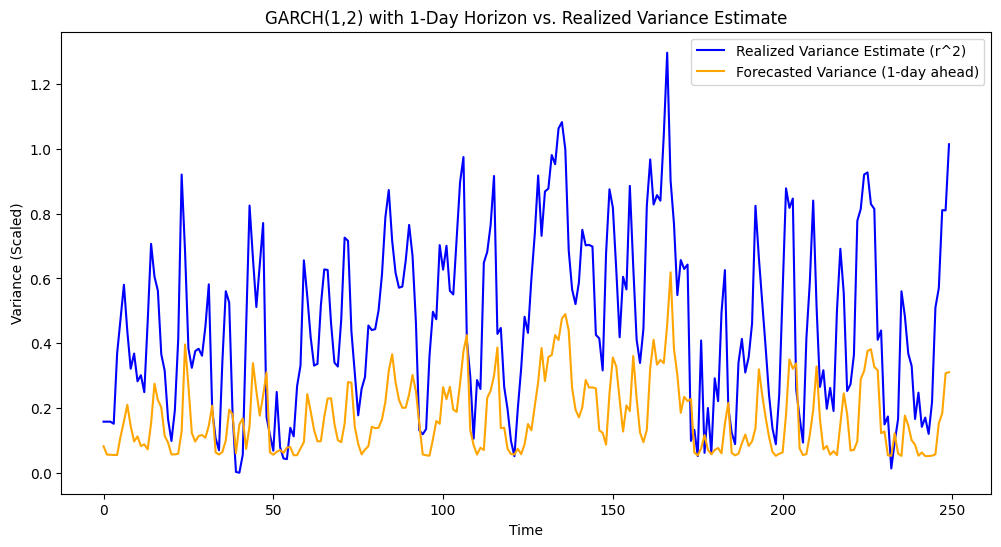

[7 Remaining] Getting out-of-sample GARCH Forecast for GOOG...
MSE = 0.3842352235090772


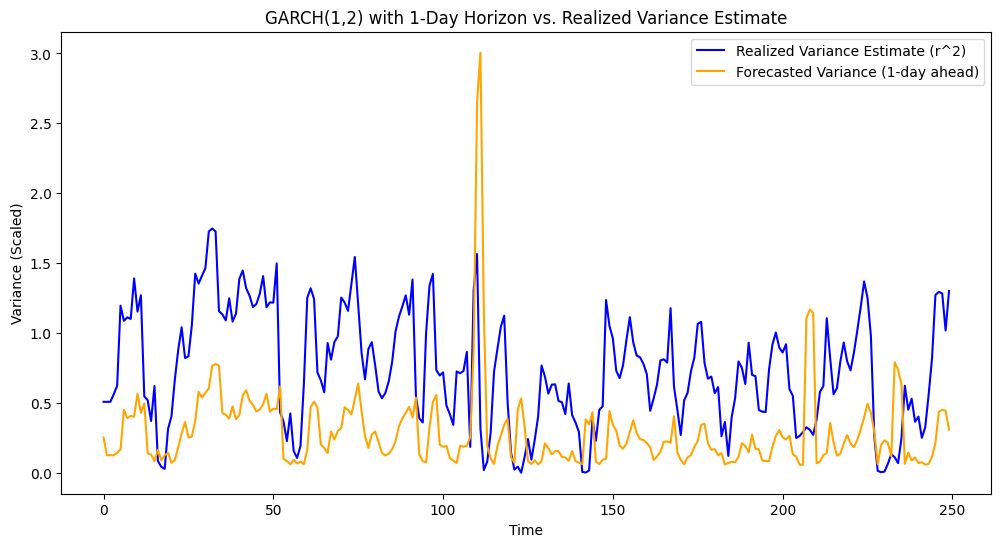

[6 Remaining] Getting out-of-sample GARCH Forecast for XLB...
MSE = 0.30713123550196314


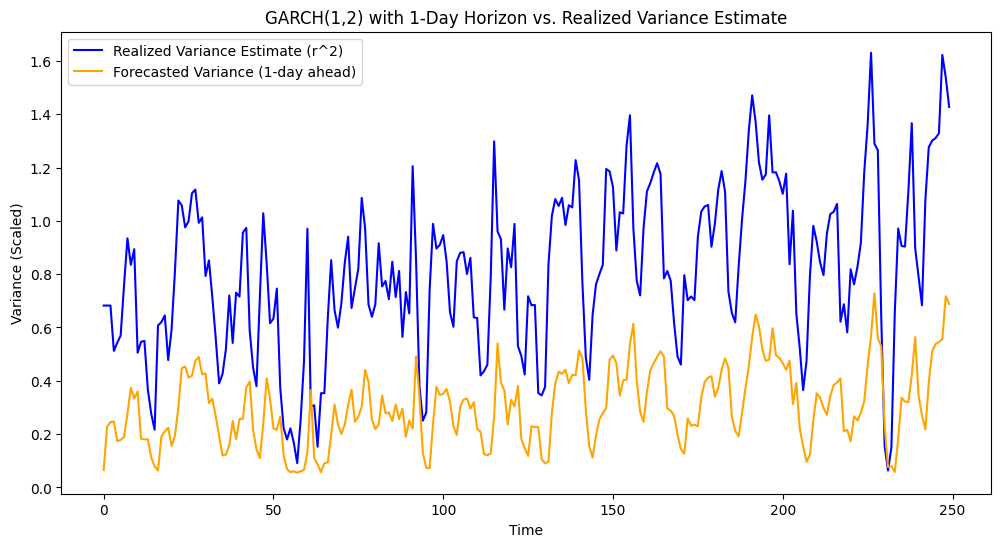

[5 Remaining] Getting out-of-sample GARCH Forecast for XLP...
MSE = 0.23996971552228935


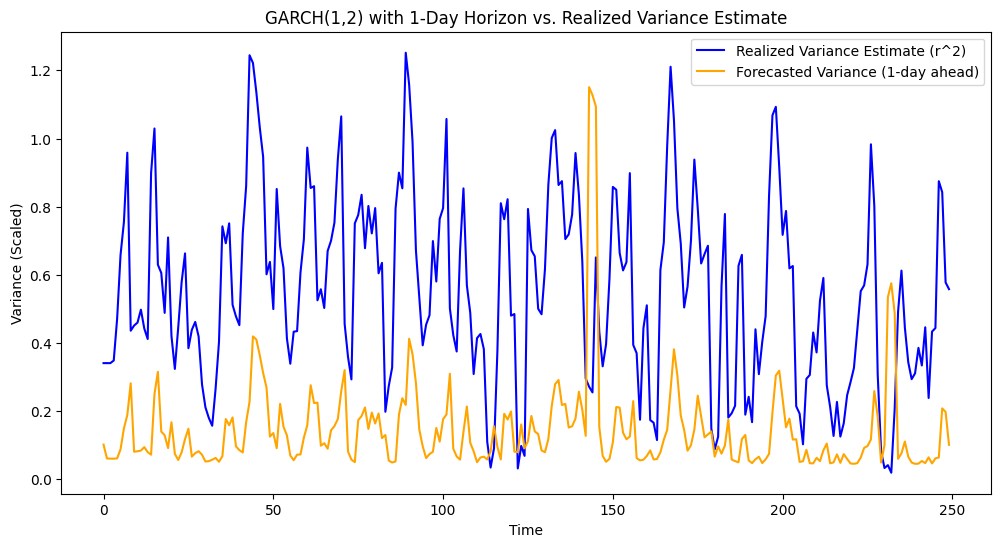

[4 Remaining] Getting out-of-sample GARCH Forecast for XLRE...
MSE = 0.01087643095810679


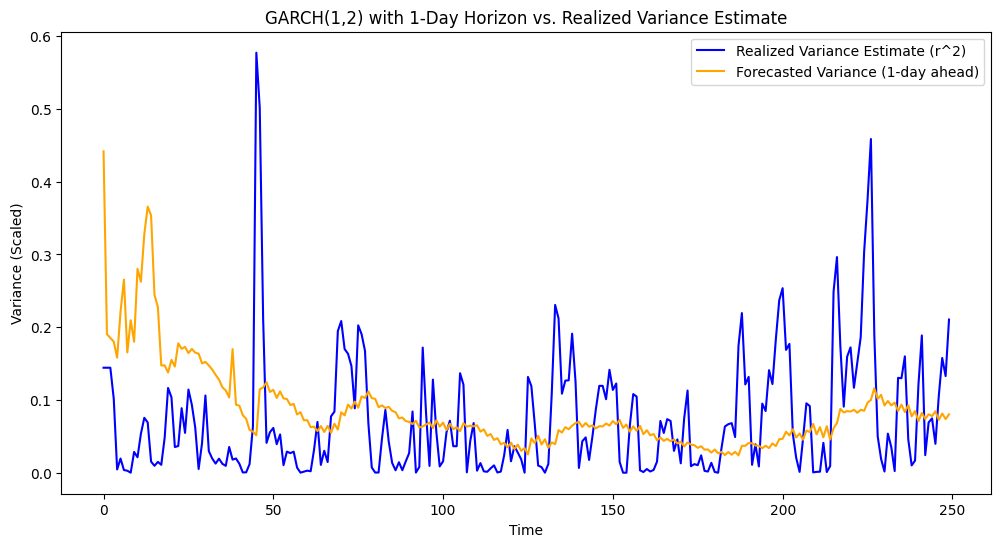

[3 Remaining] Getting out-of-sample GARCH Forecast for XLE...
MSE = 0.16047179443369697


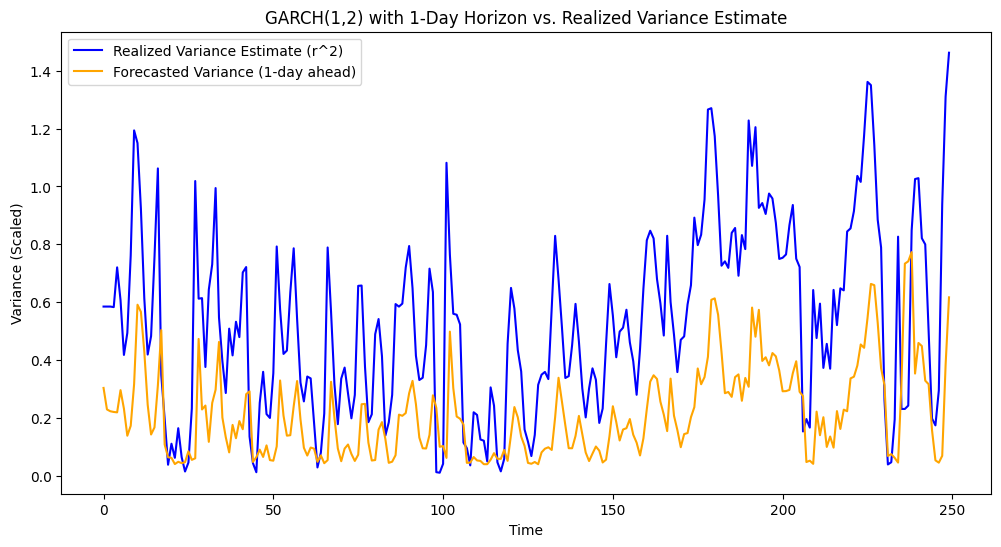

[2 Remaining] Getting out-of-sample GARCH Forecast for FB...
MSE = 0.5531738503378266


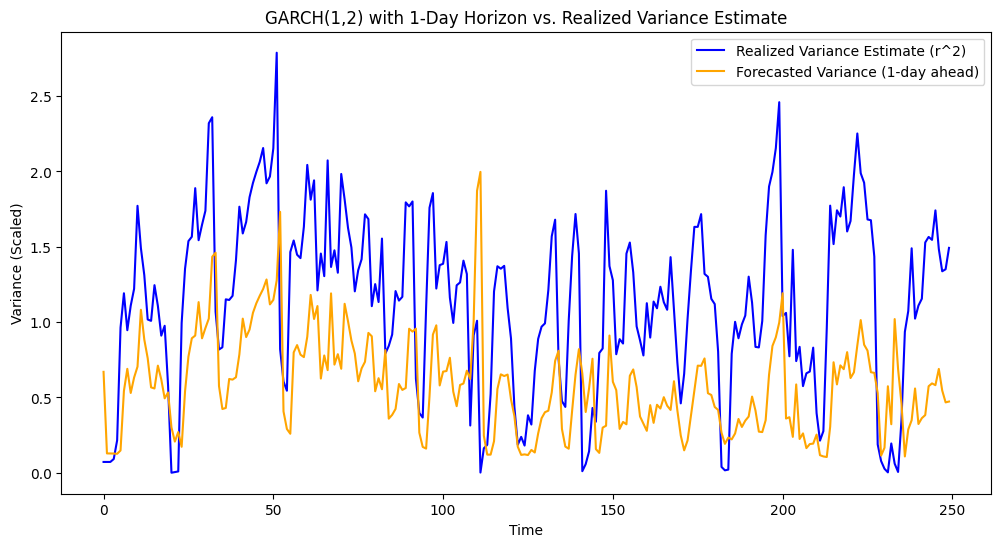

[1 Remaining] Getting out-of-sample GARCH Forecast for XLI...
MSE = 0.3693635857146102


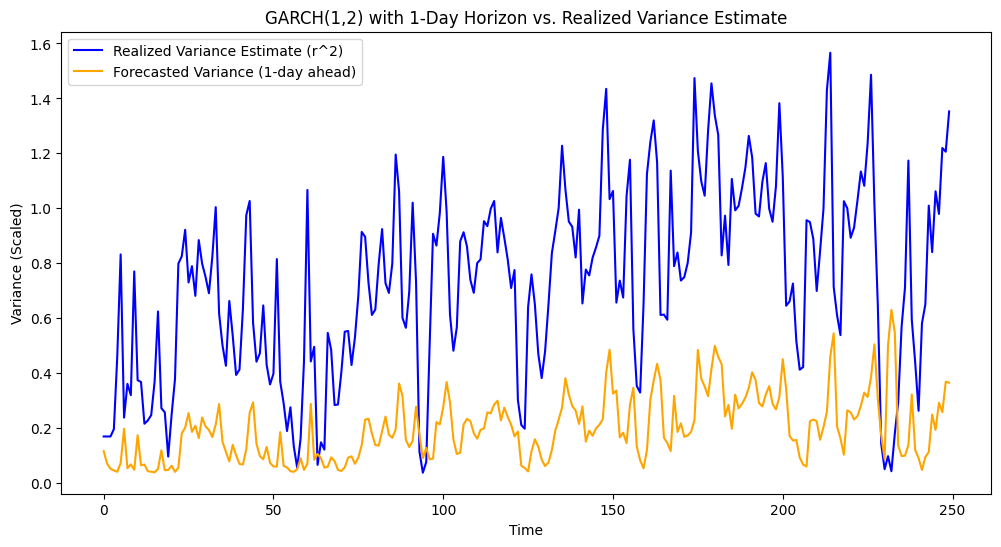

In [ ]:
garch_manager = GARCHManager(dataset, 1, 2)
garch_manager.fit_garch_for_all_stocks()
garch_manager.get_in_sample_garch_values_for_all_stocks()
garch_manager.get_out_of_sample_garch_values_for_all_stocks()

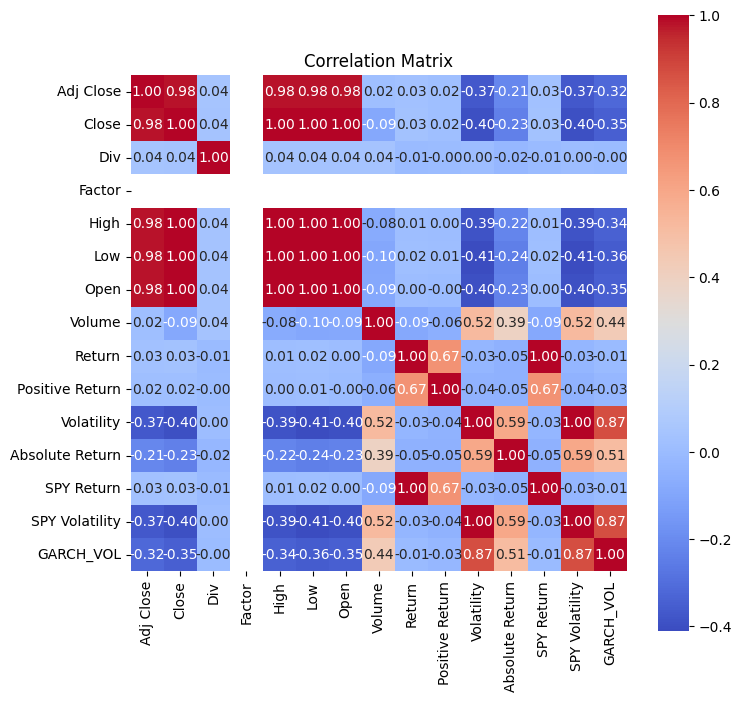

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Matrix for In Sample Data
data = dataset.train_set['SPY']
correlation_matrix = data.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Get the mean of the correlation of GARCH_VARIANCE between Absolute Return across all stocks.
garch_variance_corr = []
for ticker in dataset.train_set.keys():
  garch_variance_corr.append(dataset.train_set[ticker]['GARCH_VOL'].corr(dataset.train_set[ticker]['Absolute Return']))
print(f"Mean: {np.mean(garch_variance_corr)}")

# Do the same for Volatility
volatility_corr = []
for ticker in dataset.train_set.keys():
  volatility_corr.append(dataset.train_set[ticker]['Volatility'].corr(dataset.train_set[ticker]['GARCH_VOL']))
print(f"Mean: {np.mean(volatility_corr)}")

Mean: 0.38833718046879745
Mean: 0.8238753118646026


The correlation between the GARCH estimates and the actual Absolute/Squared Return is not high. Nonetheless it's a measure that can be obtained purely based on past data and could be used to estimate the magnitude of the return on the next day.

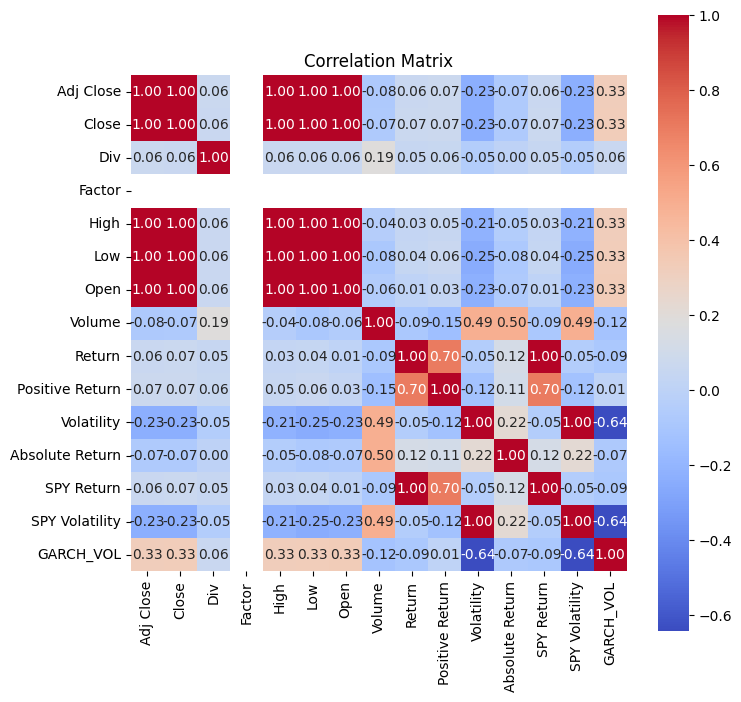

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Matrix for Out of Sample Data
data = dataset.sample_set['SPY']
correlation_matrix = data.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Get the mean of the correlation of GARCH_VARIANCE between Absolute Return across all stocks.
garch_variance_corr = []
for ticker in dataset.sample_set.keys():
  garch_variance_corr.append(dataset.sample_set[ticker]['GARCH_VOL'].corr(dataset.sample_set[ticker]['Absolute Return']))
print(f"Mean: {np.median(garch_variance_corr)}")

# Do the same for Volatility
volatility_corr = []
for ticker in dataset.sample_set.keys():
  volatility_corr.append(dataset.sample_set[ticker]['Volatility'].corr(dataset.sample_set[ticker]['GARCH_VOL']))
print(f"Mean: {np.median(volatility_corr)}")

# Do the same for Volatility
volatility_corr = []
for ticker in dataset.sample_set.keys():
  volatility_corr.append(dataset.sample_set[ticker]['Absolute Return'].corr(dataset.sample_set[ticker]['Volatility']))
print(f"Mean (Correlation between Abs. Return and Volatility): {np.median(volatility_corr)}")

Mean: -0.06936231076028684
Mean: -0.2871173653261944
Mean (Correlation between Abs. Return and Volatility): 0.32902861473248934


#### The GARCH volatility forecast has some correlation with the Volatility, which has some correlation with the magnitude of the return (Absolute Return)... However unlike any other features, the GARCH volatility forecast completely depends on past values and can be obtained at t-1.

# 5. Experimentation: Stock Direction Rolling Prediction using Univariate Temporal Convolutional Network (TCN) Classifier

Set up a CNN with 3 stacked TCN layers, the target value is "Positive Return" and it is a binary classification network.

In [ ]:
from typing import Tuple
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv1D, LayerNormalization, Activation
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
import pandas as pd
from typing import Tuple, List
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.utils.class_weight import compute_class_weight

# # for getting optimal threshold...
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, auc

# Check for GPU availability
print("GPU Available: ", tf.config.list_physical_devices('GPU'))

def prepare_data_for_training(stock_data, seq_length, scaler=None, forecast_horizon=1):
    targets = stock_data[['Positive Return']]
    if not scaler:
      scaler = StandardScaler()
      scaler.fit(stock_data.values)
      scaled_data = scaler.transform(stock_data)
    else:
      scaled_data = scaler.transform(stock_data)

    X_sequences = []
    y_targets = []

    for i in range(seq_length, len(scaled_data)):
      X_sequences.append(scaled_data[i - seq_length:i])
      y_targets.append(targets.iloc[i + forecast_horizon - 1])

    assert len(X_sequences) == len(y_targets)

    df = pd.DataFrame({
        'X': X_sequences,
        'y': y_targets
    })


    X = np.array(X_sequences, dtype=np.float32)  # (batch_size, seq_length, n_features)
    y = np.array(y_targets, dtype=np.int32).flatten()

    return (
        X,
        y,
        scaler
    )

class TCNBlock(tf.keras.layers.Layer):
    def __init__(self, n_filters: int, kernel_size: int, dilation_rate: int, dropout_rate: float = 0.2):
        super(TCNBlock, self).__init__()
        self.n_filters = n_filters
        self.conv1 = Conv1D(
            filters=n_filters,
            kernel_size=kernel_size,
            dilation_rate=dilation_rate,
            padding='causal'
        )
        self.layernorm1 = LayerNormalization()
        self.activation1 = Activation('relu')
        self.dropout1 = Dropout(dropout_rate)

        self.conv2 = Conv1D(
            filters=n_filters,
            kernel_size=kernel_size,
            dilation_rate=dilation_rate,
            padding='causal'
        )
        self.layernorm2 = LayerNormalization()
        self.activation2 = Activation('relu')
        self.dropout2 = Dropout(dropout_rate)

    def build(self, input_shape):
        self.residual = Conv1D(filters=self.n_filters, kernel_size=1) if self.n_filters != input_shape[-1] else None
        super(TCNBlock, self).build(input_shape)

    def call(self, inputs, training=None):
        x = self.conv1(inputs)
        x = self.layernorm1(x)
        x = self.activation1(x)
        x = self.dropout1(x, training=training)

        x = self.conv2(x)
        x = self.layernorm2(x)
        x = self.activation2(x)
        x = self.dropout2(x, training=training)

        if self.residual is not None:
            residual = self.residual(inputs)
        else:
            residual = inputs

        return x + residual

def create_tcn_model(
    seq_length: int,
    n_features: int,
    n_filters: List[int],
    kernel_size: int,
    dropout_rate: float,
    learning_rate: float = 0.001
) -> tf.keras.Model:
    """
    Create a TCN model with specified parameters
    """
    inputs = Input(shape=(seq_length, n_features))
    x = inputs

    # TCN blocks with different dilation rates
    for i, filters in enumerate(n_filters):
        dilation_rate = 2**i  # Exponentially increasing dilation rates: 1, 2, 4
        x = TCNBlock(
            n_filters=filters,
            kernel_size=kernel_size,
            dilation_rate=dilation_rate,
            dropout_rate=dropout_rate
        )(x)

    # Output layer
    x = Dense(1, activation='sigmoid')(x[:, -1, :])  # Use the last timestep for binary classification

    model = Model(inputs=inputs, outputs=x)
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy', 'AUC']
    )
    return model

def train_model_with_cv(train_set, sample_set, stock_symbol):
    """
    Train the TCN model
    """
    # Model parameters
    seq_length = 20
    forecast_horizon = 1
    test_size = 0.20

    # Get data from NDX dictionary
    feature_columns = ['Adj Close', 'Volume', 'Volatility', 'Return', 'Absolute Return', 'SPY Volatility', 'Positive Return']
    train_set = train_set[feature_columns]
    sample_set = sample_set[feature_columns]

    # Prepare data
    X, y, scaler = prepare_data_for_training(train_set, seq_length, None, forecast_horizon)
    # train test split the X_train and y_train values:
    split_idx = int(len(X) * (1-test_size))
    X_train, y_train = X[:split_idx], y[:split_idx]
    X_test, y_test = X[split_idx:], y[split_idx:]

    print(X_train.shape)
    print(y_train.shape)
    print(X_test.shape)
    print(y_test.shape)

    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weight_dict = dict(zip(np.unique(y_train), class_weights))

    # Create and train model
    model = create_tcn_model(
        seq_length=seq_length,
        # for now, just use features Adj Close, Volume, Volatility, today's Return,
        # today's Positive Return Boolean, and target is tomorrow's Positive Return Bool.
        n_features=len(feature_columns),
        n_filters=[32, 64, 128, 256],
        kernel_size=2,
        dropout_rate=0.20,
        learning_rate=0.0001
    )

    # Callbacks
    callbacks = [
        EarlyStopping(
            monitor='val_loss',
            patience=25,
            restore_best_weights=True
        ),
        ModelCheckpoint(
            f'best_tcn_model_{stock_symbol}.keras',
            save_best_only=True,
            monitor='val_loss'
        )
    ]

    # Train model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=100,
        batch_size=32,
        callbacks=callbacks,
        class_weight=class_weight_dict,
        verbose=1
    )

    # Plot training history
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'TCN Model Training History - {stock_symbol}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Evaluate model OUT OF SAMPLE!
    X_test, y_test, _ = prepare_data_for_training(sample_set, seq_length, scaler, forecast_horizon)
    test_loss = model.evaluate(X_test, y_test, verbose=0)
    print(f"\nTest Loss (MSE): {test_loss[0]:.4f}")
    print(f"Test MAE: {test_loss[1]:.4f}")


    # Make predictions
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int).flatten()

    # ummm
    random_list = np.random.randint(0, 2, 24)
    y_pred = np.concatenate((random_list, y_pred))

    return model, scaler, (y_test, y_pred)

# Execute training for multiple stocks
def train_stock(train_set, test_set, stock_symbol):
    print(f"\nTraining model for {stock_symbol}")
    model, scaler, (y_test, y_pred) = train_model_with_cv(
        train_set, test_set, stock_symbol
    )

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Print the confusion matrix
    print("Confusion Matrix:")
    print(cm)

    # Optional: Visualize the confusion matrix using Seaborn heatmap for better understanding
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Calculate and print additional metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    results = {
        'model': model,
        'scaler': scaler,
        'mse': np.mean((y_test - y_pred) ** 2),
        'mae': np.mean(np.abs(y_test - y_pred))
    }
    print(results)
    return (model, y_pred)


GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]



Training model for SPY


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


(3400, 25, 7)
(3400,)
(851, 25, 7)
(851,)
Epoch 1/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 32s 134ms/step - AUC: 0.5046 - accuracy: 0.5036 - loss: 0.8555 - val_AUC: 0.5164 - val_accuracy: 0.5217 - val_loss: 0.7029
Epoch 2/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - AUC: 0.5083 - accuracy: 0.5003 - loss: 0.7666 - val_AUC: 0.5250 - val_accuracy: 0.4830 - val_loss: 0.7230
Epoch 3/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - AUC: 0.5242 - accuracy: 0.5262 - loss: 0.7355 - val_AUC: 0.5219 - val_accuracy: 0.4841 - val_loss: 0.7045
Epoch 4/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - AUC: 0.5149 - accuracy: 0.4913 - loss: 0.7237 - val_AUC: 0.5227 - val_accuracy: 0.5217 - val_loss: 0.6951
Epoch 5/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - AUC: 0.5065 - accuracy: 0.5107 - loss: 0.7259 - val_AUC: 0.5309 - val_accuracy: 0.5217 - val_loss: 0.6925
Epoch 6/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - AUC: 0.5146 - accuracy: 0.5020 - loss: 0.7141 - val_AUC: 0.5270 - val_accuracy: 0.5570 - val

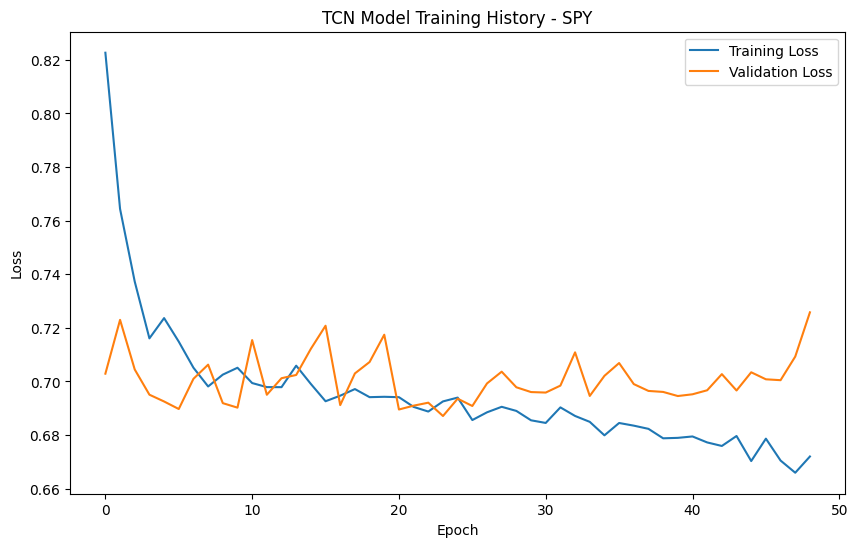

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(



Test Loss (MSE): 0.6987
Test MAE: 0.4756
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step
Confusion Matrix:
[[ 11  85]
 [  9 120]]


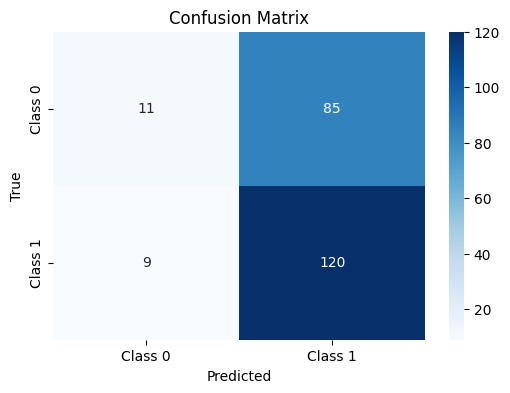

Accuracy: 0.5822
Precision: 0.5854
Recall: 0.9302
F1-Score: 0.7186
{'model': <Functional name=functional_15, built=True>, 'scaler': StandardScaler(), 'mse': 0.4397037037037037, 'mae': 0.4397037037037037}

Training model for ACN


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


(3089, 25, 7)
(3089,)
(773, 25, 7)
(773,)
Epoch 1/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 37s 243ms/step - AUC: 0.5021 - accuracy: 0.5127 - loss: 0.8539 - val_AUC: 0.5171 - val_accuracy: 0.5097 - val_loss: 0.7083
Epoch 2/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - AUC: 0.5265 - accuracy: 0.5125 - loss: 0.7533 - val_AUC: 0.5262 - val_accuracy: 0.5550 - val_loss: 0.6923
Epoch 3/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - AUC: 0.5087 - accuracy: 0.5111 - loss: 0.7307 - val_AUC: 0.5223 - val_accuracy: 0.5459 - val_loss: 0.6897
Epoch 4/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - AUC: 0.4916 - accuracy: 0.4992 - loss: 0.7281 - val_AUC: 0.5314 - val_accuracy: 0.5537 - val_loss: 0.6883
Epoch 5/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - AUC: 0.5224 - accuracy: 0.5131 - loss: 0.7134 - val_AUC: 0.5414 - val_accuracy: 0.5433 - val_loss: 0.6893
Epoch 6/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - AUC: 0.5207 - accuracy: 0.5111 - loss: 0.7103 - val_AUC: 0.5207 - val_accuracy: 0.5304 - val_loss: 0.6913
E

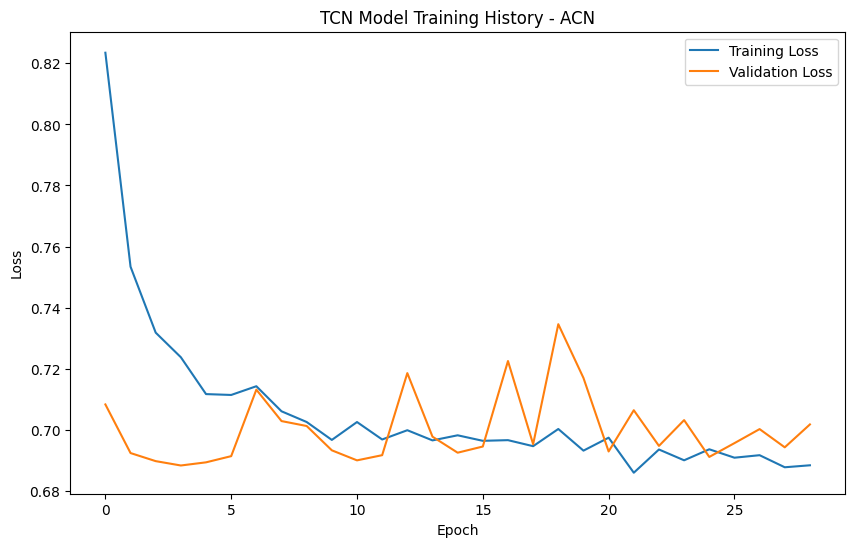

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(



Test Loss (MSE): 0.6807
Test MAE: 0.5689
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step
Confusion Matrix:
[[54 39]
 [63 69]]


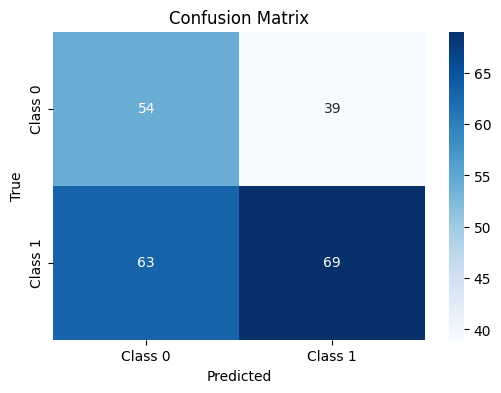

Accuracy: 0.5467
Precision: 0.6389
Recall: 0.5227
F1-Score: 0.5750
{'model': <Functional name=functional_16, built=True>, 'scaler': StandardScaler(), 'mse': 0.5034666666666666, 'mae': 0.5034666666666666}

Training model for FB
(909, 25, 7)
(909,)
(228, 25, 7)
(228,)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 450ms/step - AUC: 0.4884 - accuracy: 0.4908 - loss: 0.9730 - val_AUC: 0.5243 - val_accuracy: 0.5658 - val_loss: 0.7349
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.5116 - accuracy: 0.5158 - loss: 0.8132 - val_AUC: 0.5432 - val_accuracy: 0.4956 - val_loss: 0.7716
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - AUC: 0.5435 - accuracy: 0.5346 - loss: 0.7660 - val_AUC: 0.5390 - val_accuracy: 0.5614 - val_loss: 0.7212
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - AUC: 0.5035 - accuracy: 0.5134 - loss: 0.7869 - val_AUC: 0.5605 - val_accuracy: 0.5307 - val_loss: 0.7019
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - AUC: 0.5199 - accuracy: 0.5244 - loss: 0.7783 - val_AUC: 0.5428 - val_accuracy: 0.5526 - val_loss: 0.7085
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - AUC: 0.5832 - accuracy: 0.5598 - loss: 0.7094 - val_AUC: 0.5353 - val_accuracy: 0.5088 - val_loss: 0.7093
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s

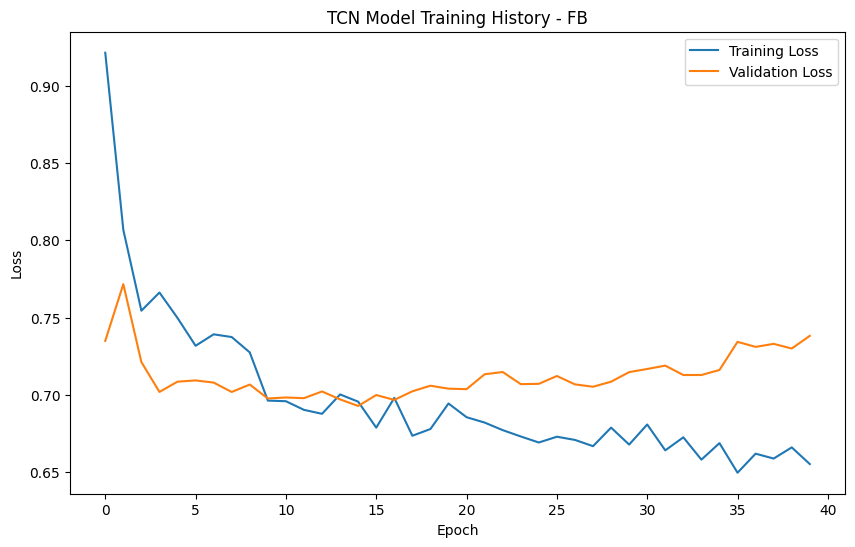

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(



Test Loss (MSE): 0.6950
Test MAE: 0.5467
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step
Confusion Matrix:
[[ 26  75]
 [ 22 102]]


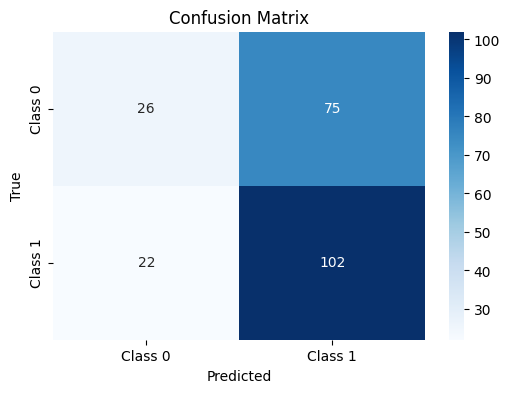

Accuracy: 0.5689
Precision: 0.5763
Recall: 0.8226
F1-Score: 0.6777
{'model': <Functional name=functional_17, built=True>, 'scaler': StandardScaler(), 'mse': 0.4706962962962963, 'mae': 0.4706962962962963}

Training model for XLV


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


(3400, 25, 7)
(3400,)
(851, 25, 7)
(851,)
Epoch 1/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 25s 96ms/step - AUC: 0.5145 - accuracy: 0.5115 - loss: 0.9076 - val_AUC: 0.5154 - val_accuracy: 0.4724 - val_loss: 0.7333
Epoch 2/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - AUC: 0.4907 - accuracy: 0.4912 - loss: 0.7603 - val_AUC: 0.5119 - val_accuracy: 0.5018 - val_loss: 0.6984
Epoch 3/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - AUC: 0.4861 - accuracy: 0.4845 - loss: 0.7384 - val_AUC: 0.5055 - val_accuracy: 0.5123 - val_loss: 0.6966
Epoch 4/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - AUC: 0.5017 - accuracy: 0.5055 - loss: 0.7218 - val_AUC: 0.5253 - val_accuracy: 0.5147 - val_loss: 0.6961
Epoch 5/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - AUC: 0.5124 - accuracy: 0.5102 - loss: 0.7230 - val_AUC: 0.5170 - val_accuracy: 0.5159 - val_loss: 0.6985
Epoch 6/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - AUC: 0.5264 - accuracy: 0.5209 - loss: 0.7060 - val_AUC: 0.5115 - val_accuracy: 0.5029 - val_lo

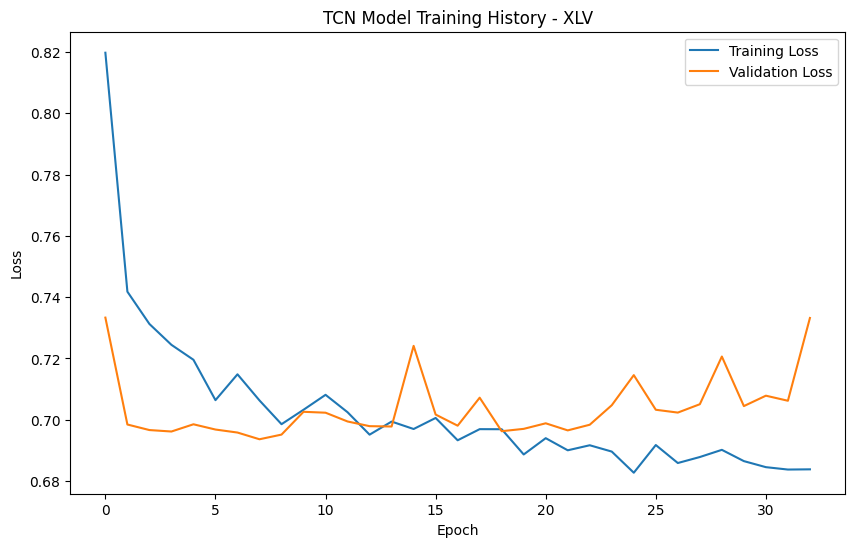

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(



Test Loss (MSE): 0.6939
Test MAE: 0.4756
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step
Confusion Matrix:
[[84 18]
 [92 31]]


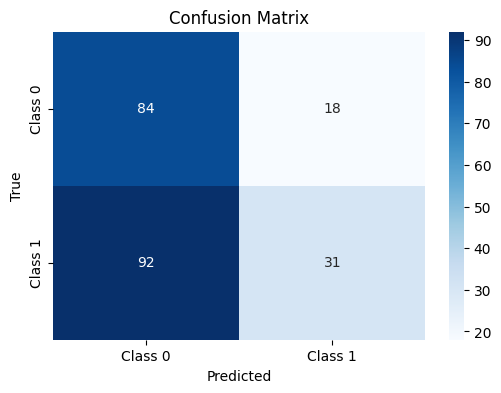

Accuracy: 0.5111
Precision: 0.6327
Recall: 0.2520
F1-Score: 0.3605
{'model': <Functional name=functional_18, built=True>, 'scaler': StandardScaler(), 'mse': 0.5263407407407408, 'mae': 0.5263407407407408}

Training model for V


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


(1750, 25, 7)
(1750,)
(438, 25, 7)
(438,)
Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 25s 215ms/step - AUC: 0.5023 - accuracy: 0.4957 - loss: 0.8348 - val_AUC: 0.4991 - val_accuracy: 0.4909 - val_loss: 0.7087
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - AUC: 0.4793 - accuracy: 0.4772 - loss: 0.7872 - val_AUC: 0.4890 - val_accuracy: 0.4863 - val_loss: 0.7165
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - AUC: 0.5474 - accuracy: 0.5347 - loss: 0.7282 - val_AUC: 0.5075 - val_accuracy: 0.4817 - val_loss: 0.7398
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - AUC: 0.5428 - accuracy: 0.5369 - loss: 0.7258 - val_AUC: 0.5361 - val_accuracy: 0.5274 - val_loss: 0.6986
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - AUC: 0.5118 - accuracy: 0.5009 - loss: 0.7241 - val_AUC: 0.5379 - val_accuracy: 0.5342 - val_loss: 0.6960
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - AUC: 0.5630 - accuracy: 0.5436 - loss: 0.7011 - val_AUC: 0.5293 - val_accuracy: 0.5228 - val_loss: 0.6946


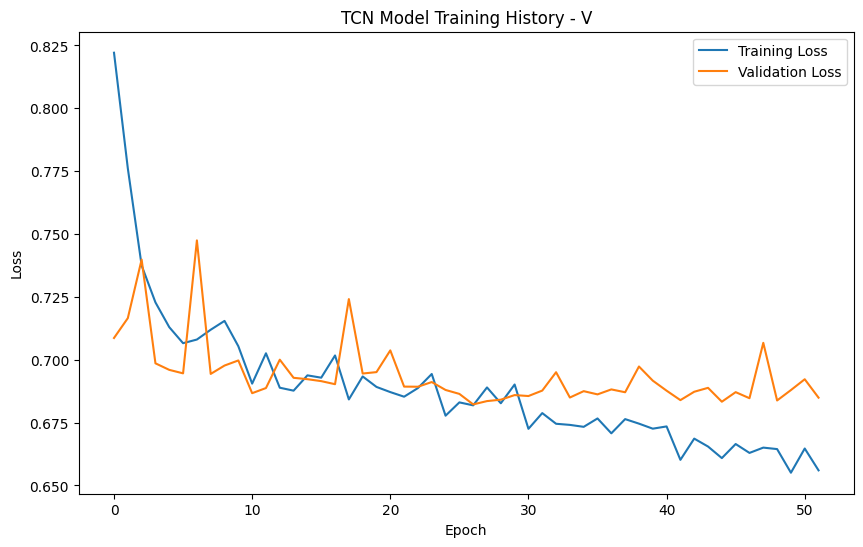

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(



Test Loss (MSE): 0.6830
Test MAE: 0.5911
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step
Confusion Matrix:
[[63 28]
 [63 71]]


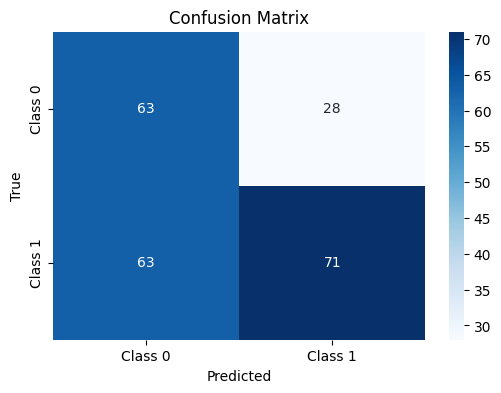

Accuracy: 0.5956
Precision: 0.7172
Recall: 0.5299
F1-Score: 0.6094
{'model': <Functional name=functional_19, built=True>, 'scaler': StandardScaler(), 'mse': 0.5114666666666666, 'mae': 0.5114666666666666}


In [ ]:

class TCNClassifierManager:
  def __init__(self, dataset: MyDataset):
    self._dataset = dataset
    self.predictions = {}
    self.tcn_models = {}

def train_multiple_stocks( stocks, tcn_classifier_manager=None ):
  for stock in stocks:
    model, prediction = train_stock(
        dataset.train_set[stock],
        dataset.sample_set[stock],
        stock
    )
    tcn_classifier_manager.tcn_models[stock] = model
    tcn_classifier_manager.predictions[stock] = prediction

tcn_classifier_manager = TCNClassifierManager(dataset)
stocks_to_test = ['SPY', 'ACN', 'FB', 'XLV', 'V']
train_multiple_stocks(stocks_to_test, tcn_classifier_manager)

The accuracies are just slightly above .50 most of the time, so it's better than random guessing... by a small margin.

However very often it keeps guessing only 0 or 1 for the entire time,, depending on what stock it is... which is not good.


# 6. Combining GARCH with TCN using a simple approach

GARCH has been widely used and has proven to be robust and reliable for forecasting volatility, while deep learning models, such as LSTM or TCN, are capable of capturing short and long term dependencies within complex and noisy time series data.

The approach below combines the GARCH implementation with the Temporal CNN classifier implementation. The GARCH model forecasts the next day's volatility while the TCN predicts tomorrow's stock movement direction.

In this simple hybrid approach, the next day's return is simply calculated by multiplying the stock movement prediction (-1 if going down, 1 if going up) with the volatility, scaled by the ratio between the mean of the return and the mean of the volatility in historical data in the training dataset...

Processing SPY...
SPY - Error Metrics:
  Returns MSE: 0.000750
  Returns MAE: 0.025947
  Returns MAPE: inf%
  Prices MSE: 43.219100
  Prices MAE: 6.277967
  Prices MAPE: 2.65%


<ipython-input-52-2daa3c431139>:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initial_price = dataset.sample_set[ticker]['Adj Close'][0]  # Starting price
<ipython-input-52-2daa3c431139>:52: RuntimeWarning: divide by zero encountered in divide
  return_mape = np.mean(np.abs((actual_returns - predicted_returns) / actual_returns)) * 100


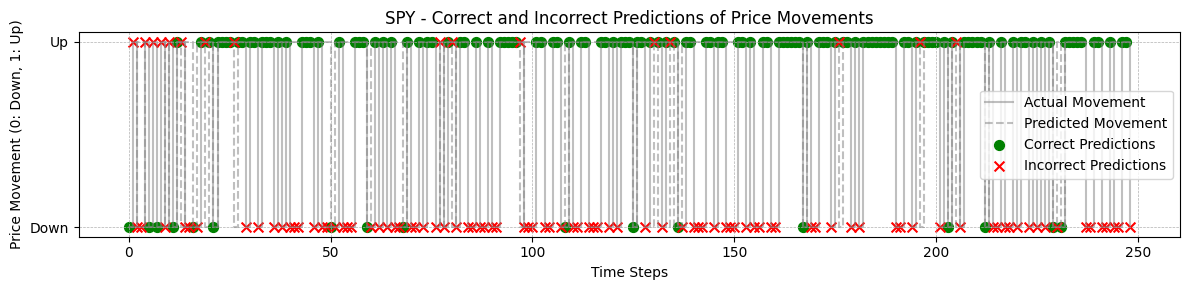

Prediction Accuracy: 0.57


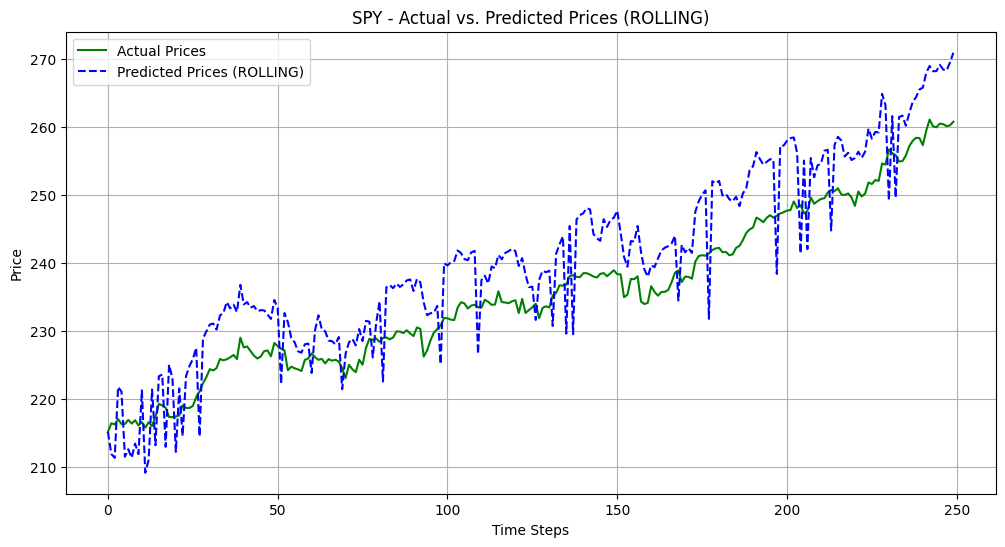

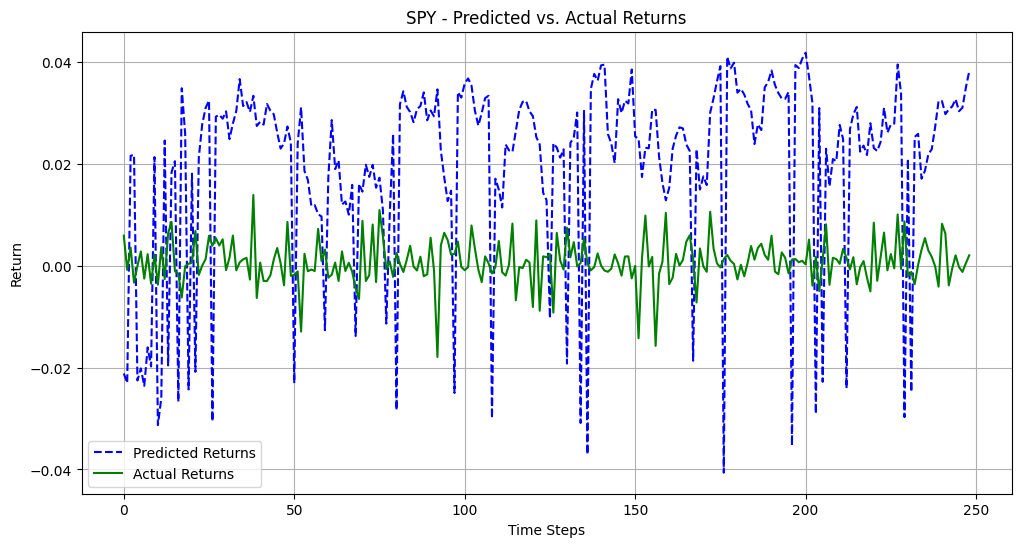

Processing ACN...
ACN - Error Metrics:
  Returns MSE: 0.001349
  Returns MAE: 0.035448
  Returns MAPE: inf%
  Prices MSE: 20.656666
  Prices MAE: 4.475984
  Prices MAPE: 3.61%


<ipython-input-52-2daa3c431139>:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initial_price = dataset.sample_set[ticker]['Adj Close'][0]  # Starting price
<ipython-input-52-2daa3c431139>:52: RuntimeWarning: divide by zero encountered in divide
  return_mape = np.mean(np.abs((actual_returns - predicted_returns) / actual_returns)) * 100


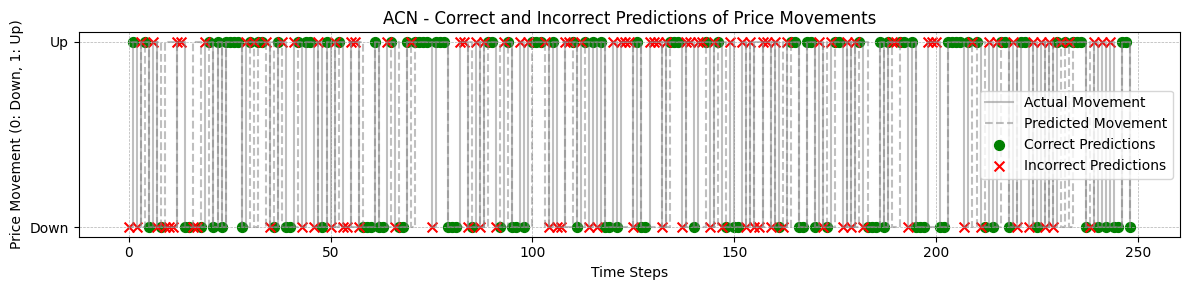

Prediction Accuracy: 0.54


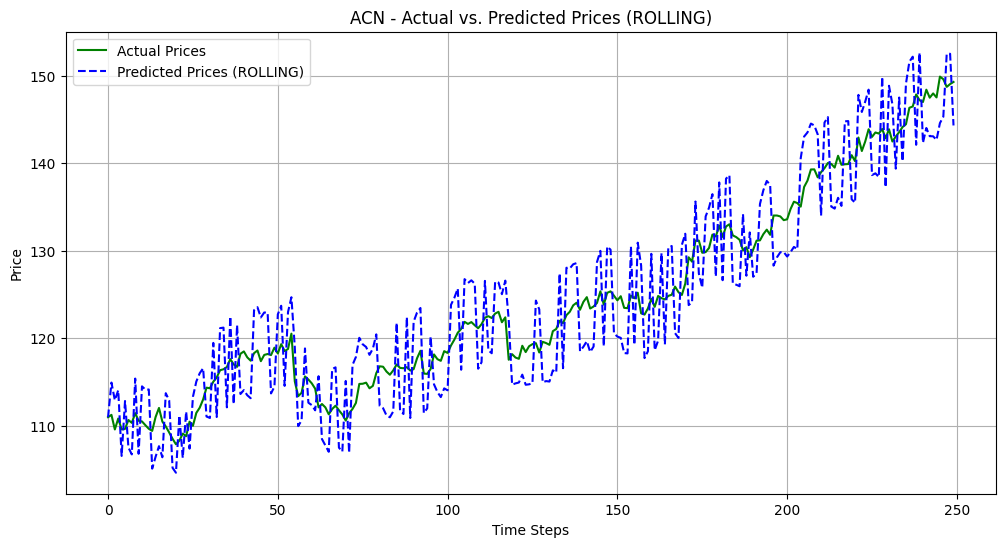

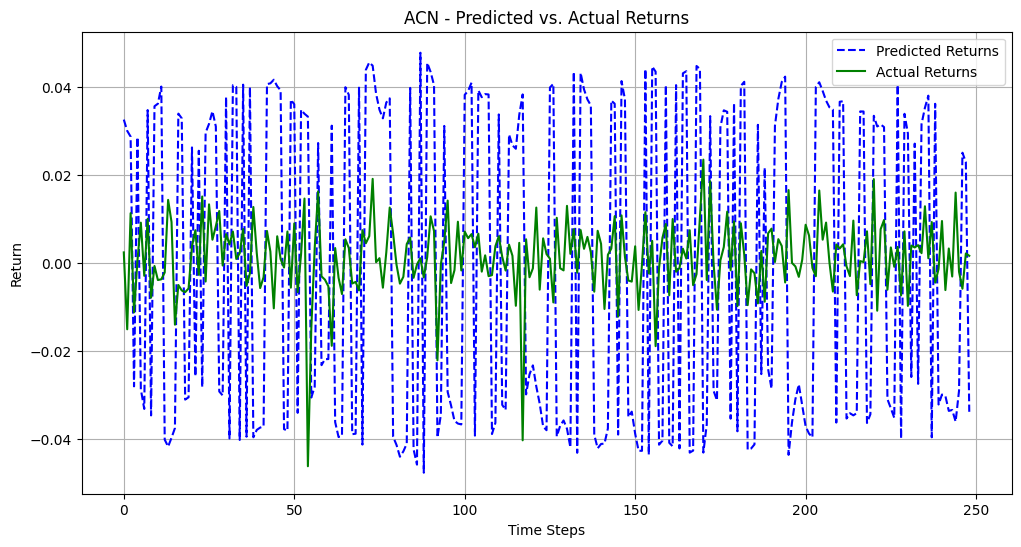

Processing FB...
FB - Error Metrics:
  Returns MSE: 0.002365
  Returns MAE: 0.045523
  Returns MAPE: inf%
  Prices MSE: 54.420377
  Prices MAE: 7.072054
  Prices MAPE: 4.48%


<ipython-input-52-2daa3c431139>:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initial_price = dataset.sample_set[ticker]['Adj Close'][0]  # Starting price
<ipython-input-52-2daa3c431139>:52: RuntimeWarning: divide by zero encountered in divide
  return_mape = np.mean(np.abs((actual_returns - predicted_returns) / actual_returns)) * 100


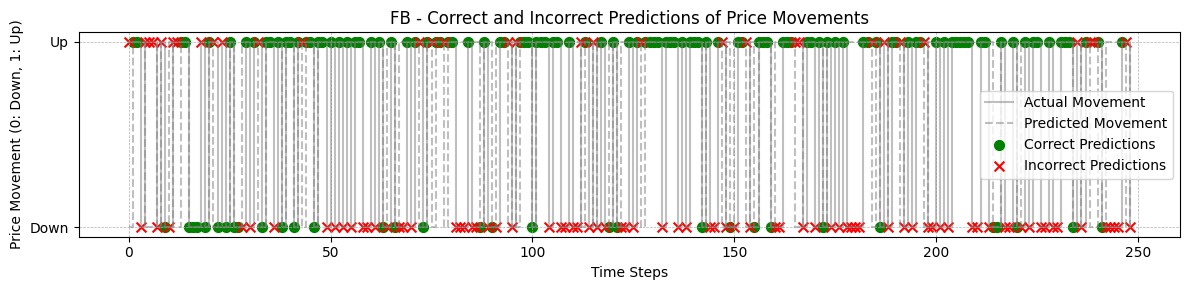

Prediction Accuracy: 0.56


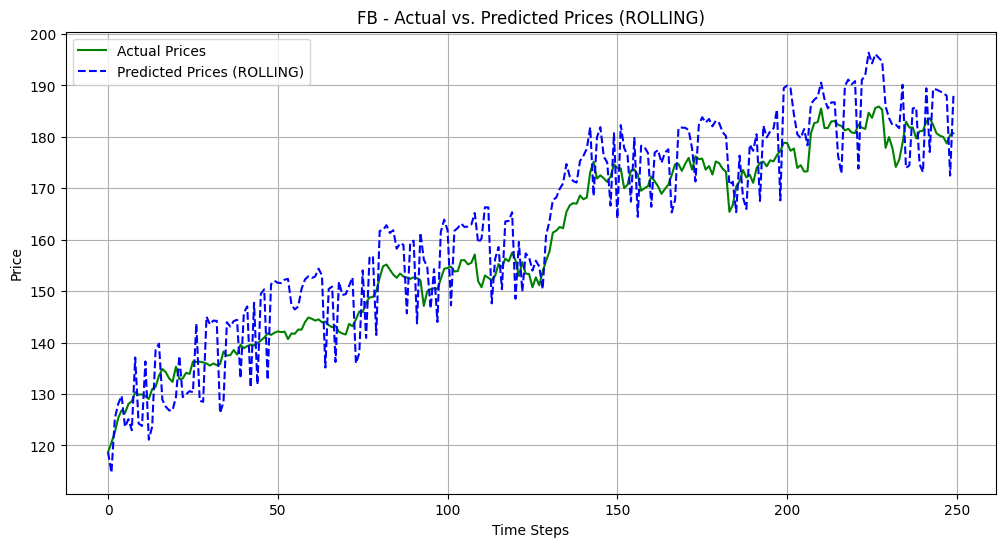

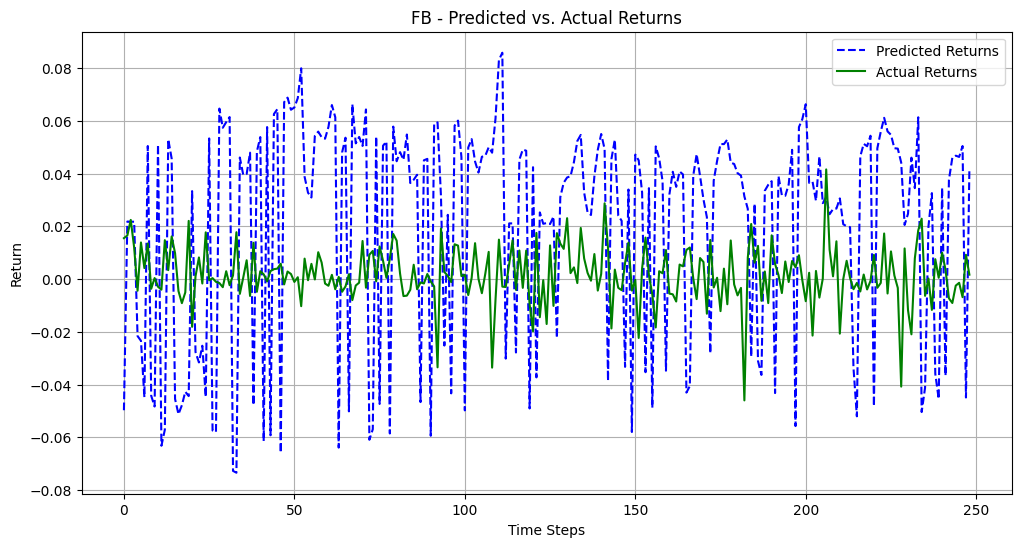

Processing XLV...
XLV - Error Metrics:
  Returns MSE: 0.000821
  Returns MAE: 0.025654
  Returns MAPE: inf%
  Prices MSE: 3.834560
  Prices MAE: 1.758755
  Prices MAPE: 2.32%


<ipython-input-52-2daa3c431139>:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initial_price = dataset.sample_set[ticker]['Adj Close'][0]  # Starting price
<ipython-input-52-2daa3c431139>:52: RuntimeWarning: divide by zero encountered in divide
  return_mape = np.mean(np.abs((actual_returns - predicted_returns) / actual_returns)) * 100


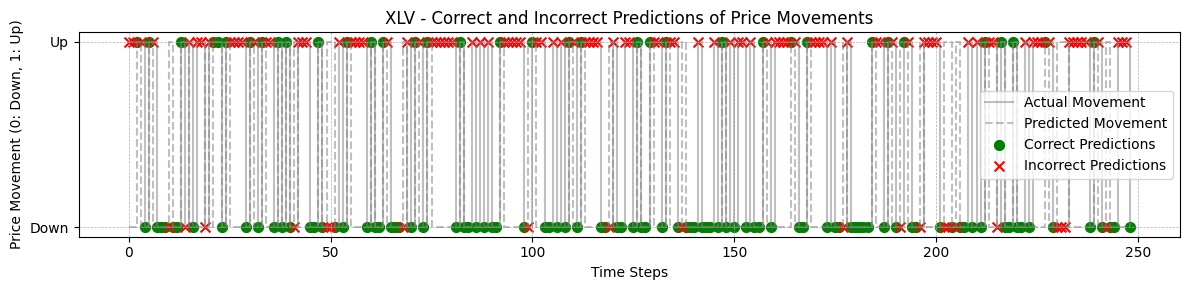

Prediction Accuracy: 0.51


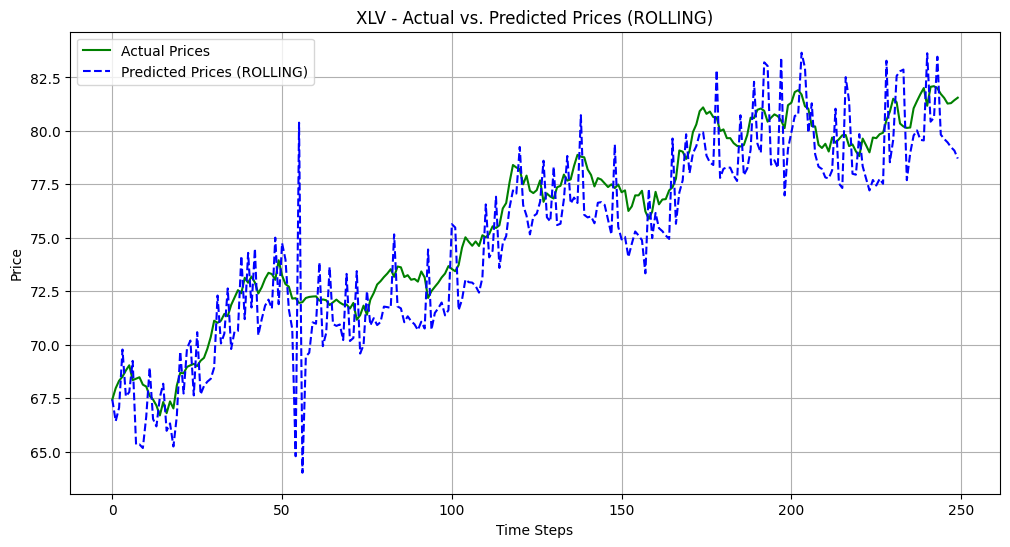

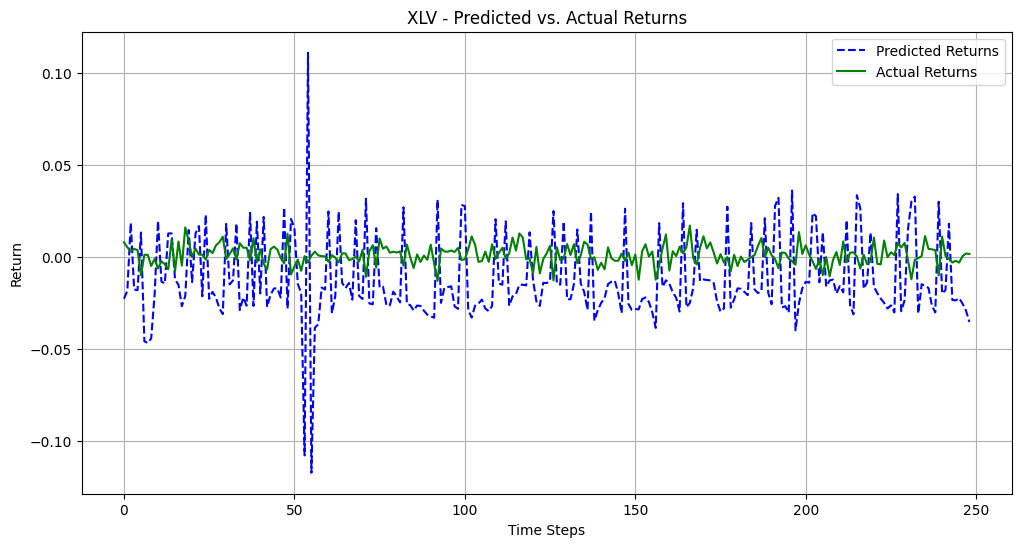

Processing V...
V - Error Metrics:
  Returns MSE: 0.001206
  Returns MAE: 0.032615
  Returns MAPE: inf%
  Prices MSE: 7.961268
  Prices MAE: 2.648893
  Prices MAPE: 2.73%


<ipython-input-52-2daa3c431139>:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initial_price = dataset.sample_set[ticker]['Adj Close'][0]  # Starting price
<ipython-input-52-2daa3c431139>:52: RuntimeWarning: divide by zero encountered in divide
  return_mape = np.mean(np.abs((actual_returns - predicted_returns) / actual_returns)) * 100


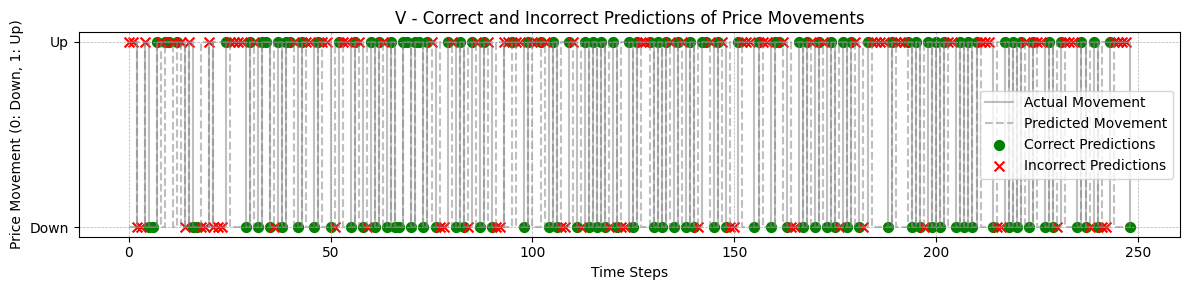

Prediction Accuracy: 0.57


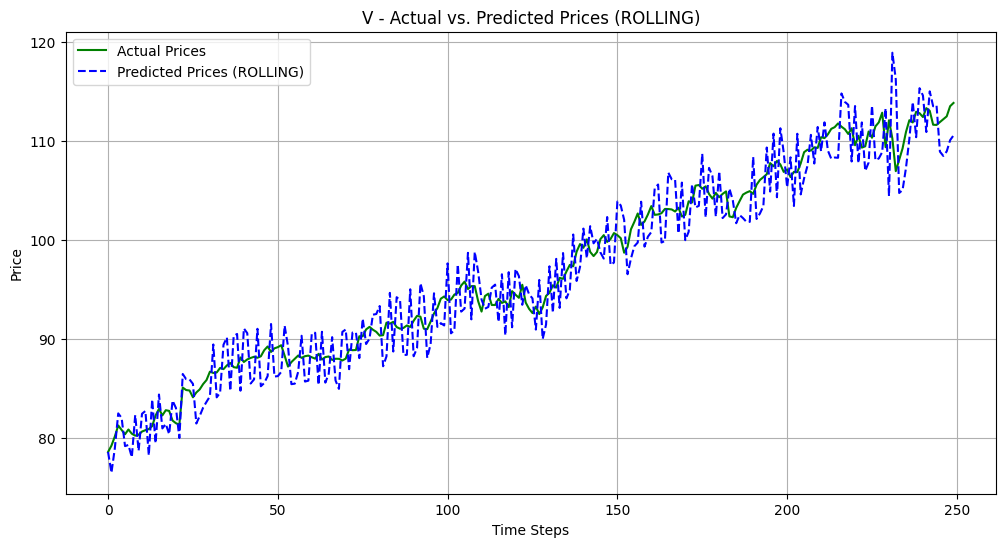

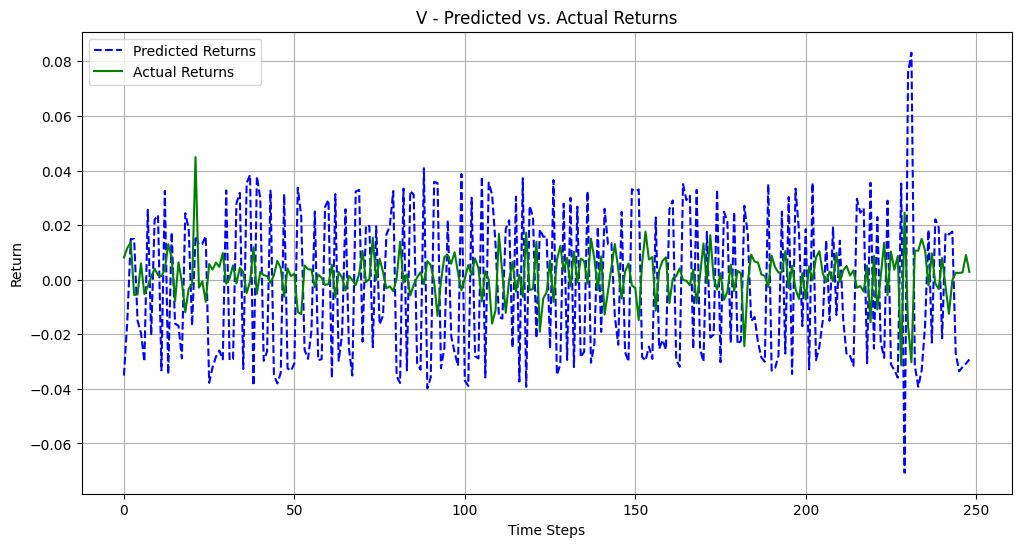

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

for ticker in stocks_to_test:
    print(f'Processing {ticker}...')

    # 1. Get the volatility prediction first.
    one_step_volatility_forecasts = dataset.sample_set[ticker]['GARCH_VOL']

    # 2. Get the predictions for next day's price movement.
    y_pred = tcn_classifier_manager.predictions[ticker].flatten()

    # fill the first missing values that are missing due to used for testing and training...
    random_list = np.random.randint(0, 2, 25 - 1)
    y_pred = np.concatenate((random_list, y_pred))

    actual_price_movement = dataset.sample_set[ticker]['Positive Return']
    # shift the actual values back by one step because the actual values are one step slower than the predictions
    actual_price_movement = actual_price_movement[1:]

    # 3. Combine them to calculate the predicted return.
    # Convert direction predictions to -1 (down) and +1 (up)
    direction = 2 * y_pred - 1
    volatility = one_step_volatility_forecasts.values[:len(direction)]  # Match lengths
    scaling_factor = np.mean(np.abs(dataset.train_set[ticker]['Return'])) / np.mean(dataset.train_set[ticker]['Volatility'])
    predicted_returns = direction * volatility * scaling_factor

    # 4. Actual returns
    actual_returns = dataset.sample_set[ticker]['Return'][:len(predicted_returns)]  # Adjust to match length
    actual_returns = np.array(actual_returns)

    # 5. Calculate prices from returns
    initial_price = dataset.sample_set[ticker]['Adj Close'][0]  # Starting price
    actual_prices = [initial_price]
    predicted_prices = [initial_price]

    for ret_actual, ret_pred in zip(actual_returns, predicted_returns):
        actual_prices.append(actual_prices[-1] * np.exp(ret_actual))  # Use exp for log returns
        predicted_prices.append(actual_prices[-1] * np.exp(ret_pred))

    # Convert lists to numpy arrays for plotting
    actual_prices = np.array(actual_prices)
    predicted_prices = np.array(predicted_prices)

    # 6. Calculate error metrics
    return_mse = mean_squared_error(actual_returns, predicted_returns)
    return_mae = mean_absolute_error(actual_returns, predicted_returns)
    price_mse = mean_squared_error(actual_prices, predicted_prices)
    price_mae = mean_absolute_error(actual_prices, predicted_prices)

    # Mean Absolute Percentage Error (MAPE)
    return_mape = np.mean(np.abs((actual_returns - predicted_returns) / actual_returns)) * 100
    price_mape = np.mean(np.abs((actual_prices - predicted_prices) / actual_prices)) * 100

    print(f'{ticker} - Error Metrics:')
    print(f'  Returns MSE: {return_mse:.6f}')
    print(f'  Returns MAE: {return_mae:.6f}')
    print(f'  Returns MAPE: {return_mape:.2f}%')
    print(f'  Prices MSE: {price_mse:.6f}')
    print(f'  Prices MAE: {price_mae:.6f}')
    print(f'  Prices MAPE: {price_mape:.2f}%')



    # 9. Plot correct and incorrect predictions of price movement
    plt.figure(figsize=(12, 3))

    # Create boolean arrays for correct and incorrect predictions
    correct_predictions = (y_pred == actual_price_movement)
    incorrect_predictions = (y_pred != actual_price_movement)

    # Plot actual price movements
    plt.step(range(len(actual_price_movement)), actual_price_movement, where='post', label='Actual Movement', color='gray', alpha=0.5)

    # Plot predicted price movements
    plt.step(range(len(y_pred)), y_pred, where='post', label='Predicted Movement', color='gray', alpha=0.5, linestyle='--')

    # Highlight correct predictions
    plt.scatter(np.where(correct_predictions)[0], actual_price_movement[correct_predictions],
                color='green', label='Correct Predictions', marker='o', s=50)

    # Highlight incorrect predictions
    plt.scatter(np.where(incorrect_predictions)[0], actual_price_movement[incorrect_predictions],
                color='red', label='Incorrect Predictions', marker='x', s=50)

    plt.title(f'{ticker} - Correct and Incorrect Predictions of Price Movements')
    plt.xlabel('Time Steps')
    plt.ylabel('Price Movement (0: Down, 1: Up)')
    plt.yticks([0, 1], ['Down', 'Up'])
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

    # Calculate and print accuracy
    accuracy = np.mean(correct_predictions)
    print(f"Prediction Accuracy: {accuracy:.2f}")



    # 7. Plot prices
    plt.figure(figsize=(12, 6))
    plt.plot(actual_prices, label='Actual Prices', linestyle='-', color='green')
    plt.plot(predicted_prices, label='Predicted Prices (ROLLING)', linestyle='--', color='blue')
    plt.title(f'{ticker} - Actual vs. Predicted Prices (ROLLING)')
    plt.xlabel('Time Steps')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

    # 8. Plot returns
    plt.figure(figsize=(12, 6))
    plt.plot(predicted_returns, label='Predicted Returns', linestyle='--', color='blue')
    plt.plot(actual_returns, label='Actual Returns', linestyle='-', color='green')
    plt.title(f'{ticker} - Predicted vs. Actual Returns')
    plt.xlabel('Time Steps')
    plt.ylabel('Return')
    plt.legend()
    plt.grid()
    plt.show()

...

# 5. Holdout Data

## Evaluate your model on the holdout data directory

**You must run the following cell** from the directory that contains your model file

Here is how we will evaluate your submission
- we will create a directory whose only content is
    - sub-directory `Data`
- we will restore your model from the saved file`
- we will run the cell in your notebook that should be a copy of the one below
    - it calls procedure `MyModel` with the arguments given below
    - your implementation of `MyModel`
        - must successfully load your model file, *given where **we** have place it as described above*
        - must successfully return one prediction for each example in the holdout directory *given where **we** have placed the holdout directory*

In [ ]:
raise NotImplementedError
holdout_dir = os.path.join(".", "Data", "holdout")
predicts = MyModel(holdout_dir, model_save_file)

In [ ]:
print("Done")